In [222]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.metrics import pairwise_distances

In [223]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/emilyng/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Reading in the Data

In [224]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [225]:
def article_sentiment_score(text):
    vader = SentimentIntensityAnalyzer()
    sentiment_score = []
    for sentence in nltk.sent_tokenize(text):
        sentiment_score.append(vader.polarity_scores(sentence)['compound'])
    return np.mean(sentiment_score)

In [226]:
df = pd.read_pickle('all_news_articles.pkl')
df.head()

id                                              title     publication  \
0  17283  House Republicans Fret About Winning Their Hea...  New York Times   
1  17284  Rift Between Officers and Residents as Killing...  New York Times   
2  17285  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...  New York Times   
3  17286  Among Deaths in 2016, a Heavy Toll in Pop Musi...  New York Times   
4  17287  Kim Jong-un Says North Korea Is Preparing to T...  New York Times   

                          author        date    year  month  url  \
0                     Carl Hulse  2016-12-31  2016.0   12.0  NaN   
1  Benjamin Mueller and Al Baker  2017-06-19  2017.0    6.0  NaN   
2                   Margalit Fox  2017-01-06  2017.0    1.0  NaN   
3               William McDonald  2017-04-10  2017.0    4.0  NaN   
4                  Choe Sang-Hun  2017-01-02  2017.0    1.0  NaN   

                                             content  NYT summary  \
0  WASHINGTON     Congressional Republicans have ...        False   
1  After the bullet shells get counted, the blood...        False   
2  When Walt Disneys Bambi opened in 1942, critic...        False   
3  Death may be the great equalizer, but it isnt ...        False   
4  SEOUL, South Korea     North Koreas leader, Ki...        False   

                                   content_processed  
0  washington congressional republican new fear c...  
1  bullet shell get counted blood dry votive cand...  
2  walt disney bambi opened critic praised spare ...  
3  death may great equalizer isnt necessarily eve...  
4  seoul south korea north korea leader kim said ...

In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129620 entries, 0 to 146032
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 129620 non-null  int64  
 1   title              129618 non-null  object 
 2   publication        129620 non-null  object 
 3   author             116618 non-null  object 
 4   date               129620 non-null  object 
 5   year               129620 non-null  float64
 6   month              129620 non-null  float64
 7   url                77332 non-null   object 
 8   content            129620 non-null  object 
 9   NYT summary        129620 non-null  bool   
 10  content_processed  129620 non-null  object 
dtypes: bool(1), float64(2), int64(1), object(7)
memory usage: 11.0+ MB


# Articles by Publication

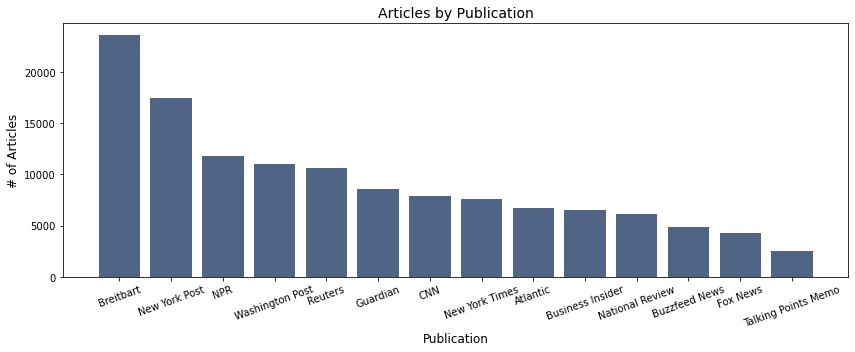

In [1186]:
plt.figure(figsize=(12,5))
plt.bar(df.publication.value_counts().index, df.publication.value_counts().values, color='#506585')
plt.xticks(rotation=20)
plt.xlabel('Publication', size=12)
plt.ylabel('# of Articles', size=12)
plt.title('Articles by Publication', size=14)
plt.tight_layout()
plt.savefig('articles_per_publication.png', transparent=True)

# Articles by Date

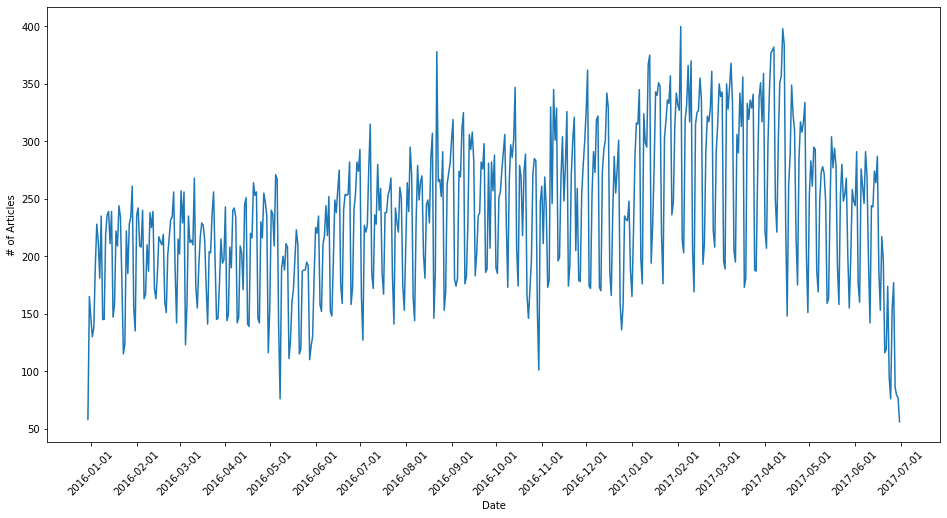

In [1185]:
plt.figure(figsize=(16,8))
plt.plot(df.date.value_counts().sort_index().index, 
         df.date.value_counts().sort_index().values)
plt.xticks(ticks=['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01', '2016-06-01',
                  '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-01', '2016-11-01', 
                  '2016-12-01', '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01', 
                  '2017-05-01', '2017-06-01', '2017-07-01'], rotation=45)
plt.xlabel('Date')
plt.ylabel('# of Articles')
plt.savefig('articles_time.png');

In [9]:
df.date.value_counts()

2017-02-03    400
2017-04-13    398
2017-04-14    384
2017-04-07    382
2017-04-06    379
             ... 
2017-06-30     77
2017-06-25     76
2016-05-08     76
2015-12-30     58
2017-07-03     56
Name: date, Length: 550, dtype: int64

## 2017-02-03 (400 articles)

In [738]:
date = '2017-02-03'
df[df.date==date].publication.value_counts()

New York Times         71
Breitbart              55
New York Post          46
Reuters                38
Washington Post        33
CNN                    30
NPR                    28
Guardian               27
Atlantic               25
National Review        19
Business Insider       14
Buzzfeed News          13
Talking Points Memo     1
Name: publication, dtype: int64

In [739]:
text = df[df.date==date]['content_processed']
text.shape

(400,)

In [740]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(text)

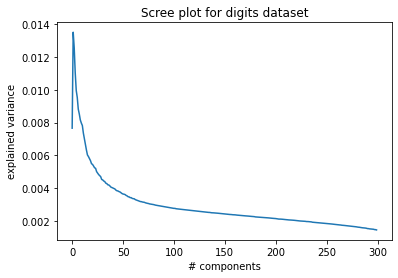

In [741]:
n_components = 300
lsa = TruncatedSVD(n_components)
doc_topic = lsa.fit_transform(tfidf)
plt.plot(lsa.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

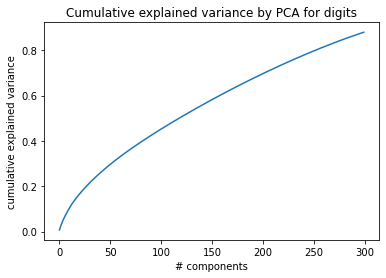

In [742]:
plt.plot(np.cumsum(lsa.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for digits');

In [746]:
index = []
for n in range(n_components):
    index.append('topic_{}'.format(n)) 
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = index,
             columns = vectorizer.get_feature_names())
topic_word

aaany  aaliyah  aardvark  aaron  aaronson   aarp  aarti   aaso  \
topic_0    0.002    0.000     0.000  0.002     0.001  0.001  0.000  0.001   
topic_1    0.002    0.001     0.001  0.002    -0.000  0.000  0.001 -0.002   
topic_2   -0.002   -0.000    -0.000 -0.002    -0.000  0.001  0.000 -0.001   
topic_3   -0.003   -0.000     0.000  0.004    -0.001 -0.001 -0.000 -0.000   
topic_4   -0.004   -0.001    -0.000  0.002    -0.000  0.001 -0.001 -0.001   
...          ...      ...       ...    ...       ...    ...    ...    ...   
topic_295  0.003    0.000    -0.002 -0.002     0.001 -0.002  0.000  0.003   
topic_296 -0.000    0.003     0.001  0.002     0.000 -0.002  0.002  0.003   
topic_297  0.007    0.001     0.000  0.005     0.000 -0.008 -0.001  0.005   
topic_298 -0.019   -0.001    -0.001 -0.005    -0.002  0.001 -0.000 -0.001   
topic_299  0.007   -0.002     0.000 -0.003     0.000 -0.010  0.001 -0.006   

           aback  abadi  ...   zons    zoo  zoology   zoom   zozo   zuck  \
topic_0    0.000  0.003  ...  0.000  0.001    0.000  0.000  0.000  0.000   
topic_1    0.001 -0.008  ... -0.000  0.002    0.000  0.000  0.000  0.001   
topic_2    0.004 -0.004  ...  0.000 -0.002   -0.000  0.000 -0.000  0.000   
topic_3    0.002  0.009  ... -0.000 -0.000   -0.000  0.000 -0.000 -0.000   
topic_4   -0.003  0.001  ...  0.000 -0.004   -0.000 -0.000 -0.000 -0.001   
...          ...    ...  ...    ...    ...      ...    ...    ...    ...   
topic_295  0.001  0.023  ... -0.000  0.018   -0.000 -0.002 -0.000  0.000   
topic_296  0.001  0.027  ... -0.000 -0.013   -0.000  0.001 -0.000  0.002   
topic_297 -0.000  0.009  ...  0.001  0.018    0.000 -0.000  0.000 -0.001   
topic_298  0.001  0.004  ...  0.000  0.020   -0.001 -0.001 -0.001 -0.000   
topic_299 -0.001 -0.009  ... -0.000  0.007    0.001  0.002  0.001  0.001   

           zuckerberg  zuckerbergs   zuma  zurich  
topic_0         0.004        0.000  0.000   0.001  
topic_1         0.003       -0.000  0.000   0.000  
topic_2         0.005        0.000  0.000   0.002  
topic_3        -0.001       -0.000  0.000   0.002  
topic_4        -0.004       -0.000 -0.000  -0.001  
...               ...          ...    ...     ...  
topic_295       0.006       -0.001  0.003  -0.000  
topic_296       0.006       -0.002 -0.009  -0.002  
topic_297      -0.004        0.001  0.001  -0.002  
topic_298       0.007       -0.001  0.001  -0.004  
topic_299       0.005       -0.000  0.000  -0.000  

[300 rows x 19371 columns]

In [747]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
trump, said, mr, president, state, would, country, people, order, one

Topic  1
bowl, super, brady, game, patriot, snap, year, belichick, quarterback, season

Topic  2
snap, company, financial, rule, spiegel, percent, bank, investor, billion, ipo

Topic  3
iran, missile, snap, nuclear, mr, sanction, bowl, super, deal, company

Topic  4
rule, financial, bowl, super, trump, brady, regulation, patriot, bank, consumer

Topic  5
order, snap, visa, ban, iran, judge, court, bowling, green, conway

Topic  6
bowling, conway, trump, green, massacre, iraqi, mr, australia, refugee, bowl

Topic  7
bowling, conway, said, rule, green, financial, iraqi, attack, raid, massacre

Topic  8
mr, bowl, super, berkeley, speech, clinton, snap, brady, yiannopoulos, court

Topic  9
berkeley, speech, bowling, conway, iran, yiannopoulos, campus, milo, missile, green

Topic  10
order, berkeley, visa, speech, yiannopoulos, executive, campus, said, refugee, country

Topic  11
rate, percent, job, wage, janua

spain, catholic, grissom, tennis, mead, tej, reckitt, somalia, experience, cofounder

Topic  180
orchestra, pop, miller, concert, he, lilesa, tillerson, doman, peat, habiyambere

Topic  181
wenger, hornick, hosszu, kant, snapchat, jolie, sarsour, justice, smart, chelsea

Topic  182
hornick, ditka, shoe, anderson, brookings, nike, miller, devos, spain, add

Topic  183
wii, reagan, clemons, child, teresa, mason, sister, bosworth, tell, glaser

Topic  184
payne, reagan, muhammad, ogle, wii, patient, republican, busch, peso, ohio

Topic  185
lapierre, lilesa, nra, steininger, pregnancy, confirmation, suicide, sarsour, data, musk

Topic  186
nevada, dragtastic, design, drag, vega, musk, gorka, clarke, poster, brooklyn

Topic  187
vick, would, steininger, pasadena, compassion, restaurant, going, freeney, iraq, administration

Topic  188
reagan, givenchy, tisci, designer, floyd, information, payne, halftime, vr, released

Topic  189
scientology, remini, hubbard, brookings, sarsour, fernandez,

iger, forum, voting, anarchist, mushkaad, aca, noble, scheduled, eman, call

Topic  272
outline, gorsuch, loroupe, muslim, executive, miller, tough, videgaray, korean, freeney

Topic  273
iger, forum, uruguay, user, brune, vick, yiannopoulos, disney, would, sierra

Topic  274
vick, catholic, sander, online, amir, obamacare, tej, militant, justice, perez

Topic  275
amir, calix, pacheco, ai, binkowski, news, inequality, hiring, left, sander

Topic  276
manning, lilesa, turning, ryan, vick, samara, statement, judge, quarterback, eu

Topic  277
ledecky, peso, iger, freeney, club, value, junk, garland, parenthood, rose

Topic  278
xiao, vick, issuer, quarterback, ban, loroupe, aca, european, wrote, neal

Topic  279
lufthansa, transgender, dadaab, airline, partopour, tresfeya, vote, flight, qaeda, court

Topic  280
lufthansa, iraqi, trade, partopour, airline, flight, outline, mason, iraq, insurance

Topic  281
obamacare, mushkaad, eman, maryams, dilbireen, transgender, cardona, ryan, dahir,

In [748]:
doc_topic = pd.DataFrame(doc_topic.round(5),
             index = df[df.date==date]['title'],
             columns = index)

doc_topic['topic'] = doc_topic.idxmax(axis=1).to_frame()
doc_topic

topic_0  topic_1  topic_2  \
title                                                                           
First Day of Syria Peace Talks Quickly Descends...  0.22901 -0.08322 -0.04671   
50 Years After Apollo Disaster, Memorial for 3 ...  0.15538  0.06112 -0.04856   
Trump’s Trade War May Have Already Begun - The ...  0.39928 -0.10623 -0.00830   
Samantha Bee to Roast Trump on Same Night as Co...  0.28172 -0.02234 -0.06157   
Billionaire Is Reported Seized From Hong Kong H...  0.18432 -0.00421  0.03456   
...                                                     ...      ...      ...   
Dear Ruth Bader Ginsburg: If you need anything ...  0.16107  0.06125 -0.02477   
Smartphones changed our lives. Let’s think befo...  0.19381  0.08631  0.04819   
This CEO was hoping for a Trump tax cut. He’s g...  0.27775  0.05915  0.19944   
Super Bowl LI prop bets to avoid at all costs, ...  0.15294  0.34709 -0.17203   
Potential side effects of the drug Trump report...  0.11870  0.03903  0.03185   

                                                    topic_3  topic_4  topic_5  \
title                                                                           
First Day of Syria Peace Talks Quickly Descends...  0.06748 -0.03884 -0.02012   
50 Years After Apollo Disaster, Memorial for 3 ...  0.02801 -0.07591 -0.05427   
Trump’s Trade War May Have Already Begun - The ...  0.10218 -0.05807 -0.27660   
Samantha Bee to Roast Trump on Same Night as Co...  0.02117 -0.07131 -0.20344   
Billionaire Is Reported Seized From Hong Kong H...  0.09654 -0.13136 -0.16654   
...                                                     ...      ...      ...   
Dear Ruth Bader Ginsburg: If you need anything ... -0.10723  0.01190  0.03672   
Smartphones changed our lives. Let’s think befo... -0.00482  0.00195 -0.01909   
This CEO was hoping for a Trump tax cut. He’s g...  0.05615  0.08217 -0.06514   
Super Bowl LI prop bets to avoid at all costs, ...  0.14866  0.19807  0.08590   
Potential side effects of the drug Trump report... -0.01112 -0.01873 -0.00349   

                                                    topic_6  topic_7  topic_8  \
title                                                                           
First Day of Syria Peace Talks Quickly Descends... -0.02770  0.02123  0.01944   
50 Years After Apollo Disaster, Memorial for 3 ... -0.01737  0.06474  0.02545   
Trump’s Trade War May Have Already Begun - The ...  0.11543 -0.06411  0.06172   
Samantha Bee to Roast Trump on Same Night as Co...  0.10422 -0.01606  0.13992   
Billionaire Is Reported Seized From Hong Kong H...  0.01757  0.05822  0.17181   
...                                                     ...      ...      ...   
Dear Ruth Bader Ginsburg: If you need anything ... -0.07588 -0.04190 -0.01007   
Smartphones changed our lives. Let’s think befo... -0.02546  0.05392 -0.10770   
This CEO was hoping for a Trump tax cut. He’s g...  0.02325 -0.00099 -0.05713   
Super Bowl LI prop bets to avoid at all costs, ...  0.09464 -0.03461  0.14865   
Potential side effects of the drug Trump report... -0.02706  0.04151 -0.05029   

                                                    topic_9  ...  topic_291  \
title                                                        ...              
First Day of Syria Peace Talks Quickly Descends... -0.08593  ...    0.00630   
50 Years After Apollo Disaster, Memorial for 3 ... -0.09402  ...   -0.00660   
Trump’s Trade War May Have Already Begun - The ... -0.14796  ...   -0.02242   
Samantha Bee to Roast Trump on Same Night as Co... -0.10519  ...   -0.00755   
Billionaire Is Reported Seized From Hong Kong H... -0.18068  ...    0.02116   
...                                                     ...  ...        ...   
Dear Ruth Bader Ginsburg: If you need anything ... -0.04445  ...    0.01248   
Smartphones changed our lives. Let’s think befo...  0.03405  ...    0.01636   
This CEO was hoping for a Trump tax cut. He’s g...  0.00528  ...   -0.08538   
Super Bowl LI prop be

In [757]:
doc_topic['topic'].value_counts()[:25]

topic_0      136
topic_1       16
topic_2       16
topic_9        8
topic_15       7
topic_16       7
topic_3        7
topic_6        6
topic_11       6
topic_5        6
topic_14       5
topic_12       5
topic_61       5
topic_24       4
topic_27       4
topic_29       4
topic_23       4
topic_4        4
topic_33       3
topic_78       3
topic_21       3
topic_25       3
topic_28       3
topic_18       3
topic_100      3
Name: topic, dtype: int64

In [758]:
doc_topic[doc_topic['topic'] == 'topic_0']['topic_0']

title
First Day of Syria Peace Talks Quickly Descends Into Quarreling - The New York Times             0.22901
Trump’s Trade War May Have Already Begun - The New York Times                                    0.39928
Samantha Bee to Roast Trump on Same Night as Correspondents’ Dinner - The New York Times         0.28172
Directors From Sundance on What Happened Next - The New York Times                               0.25124
25 Great Books by Refugees in America - The New York Times                                       0.21239
                                                                                                  ...   
Al-Qaeda says Trump has ignited ‘the flame of jihad’ with Yemen raid                             0.27126
Trump’s D.C. hotel is promising government and military discounts, but good luck getting them    0.22872
Trump’s election is the last, best hope to re-Reaganize the GOP                                  0.21909
Dear Ruth Bader Ginsburg: If you need anything — 

In [759]:
doc_topic[doc_topic['topic'] == 'topic_1']['topic_1']

title
Women Rule Halftime. Can Lady Gaga Make It Rock Again? - The New York Times           0.32542
Tom Brady, Dwight Freeney play ’For Honor’ in ’Conan’s’ Clueless Gamer - Breitbart    0.26954
Super Bowl has military ties with Garland, Cardona                                    0.30650
Historic 7th Super Bowl for Brady, Belichick                                          0.42296
51 cool things to know about Super Bowl LI                                            0.48917
The Super Bowl’s long history of unexpected heroes                                    0.43178
Eli Manning’s only ‘special formula’: Can’t be in awe of Patriots                     0.39033
Celebrities to dominate this year’s Super Bowl ads                                    0.23091
NFL moms reveal their player sons’ favorite recipes                                   0.29689
Where to celebrate the Super Bowl in NYC                                              0.22370
Michael Vick officially announces retirement from NFL 

## 2017-04-13 (398 articles)

In [1243]:
date = '2017-04-13'
n_publications = len(df[df.date==date].publication.value_counts())
print(f'Number of Publications Reported: {n_publications}')
df[df.date==date].publication.value_counts()

Number of Publications Reported: 12


New York Times      93
New York Post       64
Breitbart           52
NPR                 33
CNN                 29
Guardian            25
Atlantic            24
Washington Post     23
Reuters             17
National Review     14
Business Insider    12
Buzzfeed News       12
Name: publication, dtype: int64

In [1244]:
text = df[df.date==date]['content_processed']
text.shape

(398,)

In [765]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(text)

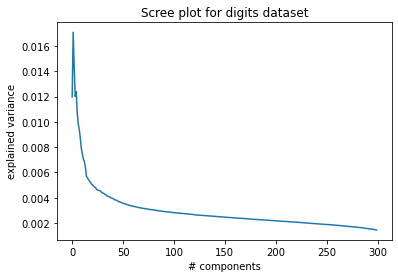

In [767]:
n_components = int(math.ceil((text.shape[0]*0.75) / 5.0) * 5.0)
lsa = TruncatedSVD(n_components)
doc_topic = lsa.fit_transform(tfidf)
plt.plot(lsa.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

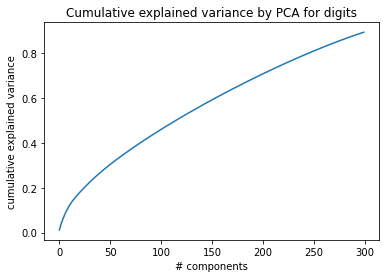

In [768]:
plt.plot(np.cumsum(lsa.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for digits');

In [772]:
index = []
for n in range(n_components):
    index.append('topic_{}'.format(n)) 
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = index,
             columns = vectorizer.get_feature_names())
topic_word

aarhus  aaroe  aaron   ab  abacha  abandon  abandoned  abandoning  \
topic_0     0.000  0.000  0.003  0.0   0.000    0.003      0.004       0.001   
topic_1    -0.000 -0.000 -0.004 -0.0  -0.000    0.002      0.000       0.000   
topic_2    -0.000 -0.000 -0.001  0.0   0.000    0.001      0.000       0.001   
topic_3    -0.001 -0.001  0.001 -0.0  -0.000   -0.001     -0.005      -0.000   
topic_4    -0.000 -0.000  0.002  0.0  -0.000   -0.004      0.000       0.003   
...           ...    ...    ...  ...     ...      ...        ...         ...   
topic_295  -0.002 -0.002  0.008  0.0   0.001   -0.001     -0.008      -0.007   
topic_296  -0.001 -0.001 -0.002  0.0   0.001    0.010     -0.003      -0.001   
topic_297  -0.005 -0.005  0.019  0.0   0.001   -0.009      0.003       0.005   
topic_298   0.000  0.000 -0.001  0.0  -0.001   -0.006      0.006       0.003   
topic_299   0.005  0.005 -0.009 -0.0  -0.001   -0.005      0.001       0.007   

           abandonment  abbas  ...   zone    zoo  zubaida  zubaidas  \
topic_0          0.001  0.000  ...  0.004  0.003    0.002     0.001   
topic_1         -0.001 -0.000  ... -0.000 -0.002   -0.001    -0.001   
topic_2         -0.002  0.000  ...  0.003  0.003    0.004     0.002   
topic_3         -0.000 -0.001  ... -0.000 -0.000   -0.003    -0.001   
topic_4         -0.001 -0.000  ...  0.002  0.005    0.002     0.001   
...                ...    ...  ...    ...    ...      ...       ...   
topic_295       -0.001 -0.002  ... -0.001  0.006    0.003     0.001   
topic_296       -0.002 -0.000  ...  0.009  0.013   -0.000    -0.000   
topic_297        0.001 -0.001  ...  0.003  0.005    0.001     0.000   
topic_298        0.005 -0.001  ...  0.002 -0.002   -0.000    -0.000   
topic_299        0.000  0.001  ... -0.007  0.001   -0.005    -0.002   

           zuckerberg  zuckerbergs  zukunft  zurbuchen  zurich  zvyagintsev  
topic_0         0.002        0.001    0.003      0.001   0.003        0.000  
topic_1        -0.002       -0.000    0.001     -0.001  -0.004       -0.000  
topic_2         0.002        0.000   -0.002      0.002   0.008        0.000  
topic_3        -0.004       -0.001   -0.003     -0.003  -0.001       -0.001  
topic_4        -0.000        0.000    0.000      0.001   0.005       -0.000  
...               ...          ...      ...        ...     ...          ...  
topic_295      -0.016       -0.006   -0.012      0.004   0.046       -0.002  
topic_296       0.008        0.005    0.002     -0.000  -0.015       -0.000  
topic_297       0.017        0.007   -0.029     -0.001  -0.011       -0.001  
topic_298       0.013        0.005   -0.018     -0.002   0.054       -0.001  
topic_299       0.002        0.001    0.020     -0.003  -0.035        0.001  

[300 rows x 17935 columns]

In [773]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
trump, mr, said, china, president, north, state, korea, would, russia

Topic  1
north, korea, china, korean, nuclear, trump, missile, weapon, chinese, bomb

Topic  2
airline, dao, passenger, flight, incident, united, north, chicago, video, plane

Topic  3
airline, mr, dao, flight, passenger, united, incident, russia, plane, chicago

Topic  4
afghanistan, bomb, attack, assad, syrian, russia, isi, syria, force, coalition

Topic  5
trump, president, airline, dao, flight, passenger, nato, obamacare, bannon, house

Topic  6
afghanistan, bomb, isi, mr, moab, military, force, afghan, dropped, republican

Topic  7
burger, google, king, ad, whopper, device, commercial, home, user, trigger

Topic  8
enceladus, moon, ocean, europa, cassini, nasa, hydrogen, saturn, life, earth

Topic  9
republican, democrat, north, burger, obamacare, parenthood, election, moon, enceladus, nuclear

Topic  10
china, coalition, taiwan, tesla, car, sdf, state, uber, vehicle, company

Topic  11
court, justice

pompeo, wikileaks, mumps, taiwan, uefa, snopes, fracking, study, hankins, officer

Topic  130
eel, gay, magnetic, dinosaur, gif, myanmar, exhibition, art, unit, chechnya

Topic  131
mccartney, pandora, label, mets, bruce, dinosaur, coffman, baldwin, medium, marriage

Topic  132
mccartney, dinosaur, indian, golf, coachella, oakland, juda, snopes, mulvaney, voter

Topic  133
eel, fisher, mulvaney, diamond, vaccine, magnetic, jewelry, california, bipolar, agency

Topic  134
dinosaur, stone, bird, teleocrater, story, eramo, golf, rolling, calorie, archosaur

Topic  135
dinosaur, galaxy, juda, goldman, belichick, welch, patent, tran, cohn, epa

Topic  136
caplan, patent, calorie, crispr, climate, would, bannon, hankins, abortion, uc

Topic  137
party, infant, people, peanut, mccartney, shhaideh, mumps, hankins, maggot, hijacker

Topic  138
eel, magnetic, fracking, farrington, thompson, snopes, card, cessario, william, donnie

Topic  139
temperature, deportation, climate, harvard, shell, ind

medicaid, mondella, woznik, holleeder, meredith, stuhldreher, ticket, asma, glasser, expansion

Topic  242
walter, davis, trade, port, asma, woznik, fracking, mccartney, breyer, eramo

Topic  243
jackson, port, merkel, gatlinburg, walden, vaccine, hong, yousafzai, gop, introspection

Topic  244
holleeder, process, donnie, recount, persey, followed, temperature, missing, meredith, island

Topic  245
holleeder, dolan, lansing, sanctuary, rosic, zinke, putin, meredith, vaccine, oakley

Topic  246
jesus, sprint, fracking, walden, united, goat, coptic, drought, gym, egypt

Topic  247
saleh, walden, cnn, dimon, fight, plane, pruitt, albaher, kushner, dhs

Topic  248
visitor, trafficking, wackrow, log, jackson, memo, york, test, administration, woznik

Topic  249
woznik, medicaid, flynn, emission, dimon, ravel, lichtman, russian, policy, congress

Topic  250
holleeder, monaghan, enninful, benjamin, microsoft, holleeders, board, maischak, maischaks, abortion

Topic  251
vaccine, lyft, zurich, 

In [774]:
doc_topic = pd.DataFrame(doc_topic.round(5),
             index = df[df.date==date]['title'],
             columns = index)

doc_topic['topic'] = doc_topic.idxmax(axis=1).to_frame()
doc_topic['publication'] = df[df.date == date]['publication'].values
doc_topic['content'] = df[df.date == date]['content no nonascii'].values
doc_topic['content_processed'] = df[df.date == date]['content_processed'].values
doc_topic.head()

topic_0  topic_1  topic_2  \
title                                                                           
Edward Enninful Is Named Editor in Chief at Bri...  0.13779 -0.11005 -0.06019   
Trump’s Shift on Russia Brings Geopolitical Whi...  0.55727 -0.12351 -0.34849   
U.S. Takes Sharper Tone on Russia’s Role in Syr...  0.56134 -0.06592 -0.34870   
Trump Faces the Limits of American Power - The ...  0.32155  0.00253 -0.00534   
Trump Reversals Hint at Wall Street Wing’s Sway...  0.45890 -0.10120 -0.25781   

                                                    topic_3  topic_4  topic_5  \
title                                                                           
Edward Enninful Is Named Editor in Chief at Bri...  0.01393 -0.02836 -0.12874   
Trump’s Shift on Russia Brings Geopolitical Whi...  0.20869  0.12789 -0.09187   
U.S. Takes Sharper Tone on Russia’s Role in Syr...  0.26971  0.18817 -0.10865   
Trump Faces the Limits of American Power - The ...  0.04020  0.08499 -0.01336   
Trump Reversals Hint at Wall Street Wing’s Sway... -0.02811 -0.10009  0.12851   

                                                    topic_6  topic_7  topic_8  \
title                                                                           
Edward Enninful Is Named Editor in Chief at Bri...  0.02608 -0.00023  0.00839   
Trump’s Shift on Russia Brings Geopolitical Whi... -0.17886  0.03653  0.02631   
U.S. Takes Sharper Tone on Russia’s Role in Syr... -0.19579  0.05388  0.01951   
Trump Faces the Limits of American Power - The ... -0.00413 -0.01142 -0.01351   
Trump Reversals Hint at Wall Street Wing’s Sway...  0.06102  0.00653  0.01522   

                                                    topic_9  ...  topic_294  \
title                                                        ...              
Edward Enninful Is Named Editor in Chief at Bri... -0.05910  ...   -0.01574   
Trump’s Shift on Russia Brings Geopolitical Whi... -0.01237  ...   -0.01902   
U.S. Takes Sharper Tone on Russia’s Role in Syr... -0.04051  ...   -0.00049   
Trump Faces the Limits of American Power - The ... -0.03512  ...    0.01610   
Trump Reversals Hint at Wall Street Wing’s Sway...  0.06447  ...    0.05549   

                                                    topic_295  topic_296  \
title                                                                      
Edward Enninful Is Named Editor in Chief at Bri...   -0.03120   -0.02341   
Trump’s Shift on Russia Brings Geopolitical Whi...   -0.00584   -0.03391   
U.S. Takes Sharper Tone on Russia’s Role in Syr...   -0.02964   -0.04582   
Trump Faces the Limits of American Power - The ...    0.02590   -0.08022   
Trump Reversals Hint at Wall Street Wing’s Sway...   -0.01186   -0.02306   

                                                    topic_297  topic_298  \
title                                                                      
Edward Enninful Is Named Editor in Chief at Bri...   -0.00045    0.00267   
Trump’s Shift on Russia Brings Geopolitical Whi...   -0.02067    0.01842   
U.S. Takes Sharper Tone on Russia’s Role in Syr...   -0.02088    0.02232   
Trump Faces the Limits of American Power - The ...   -0.08647   -0.04452   
Trump Reversals Hint at Wall Street Wing’s Sway...    0.01003    0.07026   

                                                    topic_299     topic  \
title                                                                     
Edward Enninful Is Named Editor in Chief at Bri...    0.00515  topic_71   
Trump’s Shift on Russia Brings Geopolitical Whi...   -0.07617   topic_0   
U.S. Takes Sharper Tone on Russia’s Role in Syr...   -0.04249   topic_0   
Trump Faces the Limits of American Power - The ...   -0.02110   topic_0   
Trump Reversals Hint at Wall Street Wing’s Sway...    0.00357   topic_0   

                                                       publication  \
title                                                                
Edward Enninful Is Named Editor in Chief at Bri...  New York T

In [775]:
doc_topic['topic'].value_counts()[:25]

topic_0      119
topic_1       16
topic_3       10
topic_6        8
topic_4        6
topic_15       6
topic_18       5
topic_7        5
topic_8        5
topic_13       4
topic_11       4
topic_22       4
topic_35       3
topic_47       3
topic_16       3
topic_82       3
topic_36       3
topic_34       3
topic_24       3
topic_49       3
topic_10       3
topic_29       3
topic_42       3
topic_134      3
topic_77       3
Name: topic, dtype: int64

In [776]:
doc_topic[doc_topic['topic'] == 'topic_1']['topic_1'].sort_values()

title
Buchanan: Trump’s MOAB Strike Delivered a ’Message’ to North Korea - Breitbart                               0.26367
Trump on ’Mother of All Bombs’: I Don’t Know If It ’Sends a Message’ to North Korea - Breitbart              0.34619
North Korea may be able to arm missiles with sarin, Japan PM says                                            0.40431
North Korea May Be Preparing a Nuclear Test for Kim Il-Sung’s Birthday - Breitbart                           0.40469
North Korean nuclear site ’primed and ready’: analysts                                                       0.42658
’The Art Of The Deal’ Prevails In U.S.-China Talks, For Now At Least                                         0.43357
Trump prepared to launch preemptive strike against North Korea: report                                       0.46736
Trump: I’ll Make ’Not as Good a Trade Deal’ if China Helps with North Korea                                  0.47434
Report: Trump Admin Preparing to Strike North Korea if Nuc

### Round 1

In [779]:
#Redo topic modeling on topics where article counts > number of publications reported for that day
topic_counts = doc_topic['topic'].value_counts()
overloaded_topics = topic_counts[topic_counts > n_publications].index.tolist()

In [780]:
doc_topic2 = doc_topic[doc_topic['topic'].isin(overloaded_topics)][['publication', 'content', 'content_processed']]

In [781]:
text = doc_topic2['content_processed']
text.shape

(135,)

In [782]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(text)

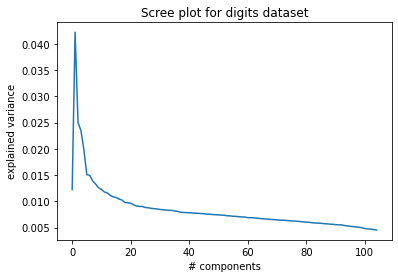

In [783]:
n_components = int(math.ceil((text.shape[0]*0.75) / 5.0) * 5.0)
lsa = TruncatedSVD(n_components)
doc_topic = lsa.fit_transform(tfidf)
plt.plot(lsa.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

In [786]:
index = []
for n in range(n_components):
    index.append('topic_{}'.format(n)) 
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = index,
             columns = vectorizer.get_feature_names())
topic_word

aarhus  aaroe  aaron  abacha  abandon  abandoned  abandoning  \
topic_0     0.001  0.001  0.002   0.000    0.004      0.004       0.001   
topic_1    -0.001 -0.001 -0.003  -0.000    0.004     -0.000      -0.001   
topic_2     0.001  0.001 -0.004   0.000    0.003      0.011       0.001   
topic_3    -0.001 -0.001  0.008  -0.000   -0.002     -0.001      -0.001   
topic_4    -0.002 -0.002 -0.003  -0.000    0.003      0.000      -0.002   
...           ...    ...    ...     ...      ...        ...         ...   
topic_100  -0.002 -0.002  0.012  -0.002    0.007     -0.004      -0.002   
topic_101  -0.002 -0.002 -0.013  -0.001   -0.004     -0.001      -0.002   
topic_102   0.002  0.002 -0.009  -0.000    0.007      0.004       0.002   
topic_103   0.000  0.000  0.018  -0.000   -0.009     -0.008       0.000   
topic_104  -0.001 -0.001 -0.010   0.001    0.002      0.003      -0.001   

           abandonment   abby    abc  ...   zeki  zenefits  zenko   zero  \
topic_0          0.001  0.000  0.001  ...  0.001     0.001  0.001  0.001   
topic_1         -0.002 -0.000 -0.001  ... -0.001    -0.002  0.004 -0.001   
topic_2          0.001  0.001 -0.002  ... -0.002    -0.002 -0.002 -0.001   
topic_3         -0.003 -0.002 -0.000  ... -0.000    -0.001  0.001  0.002   
topic_4          0.001 -0.003  0.001  ... -0.001     0.002 -0.003 -0.001   
...                ...    ...    ...  ...    ...       ...    ...    ...   
topic_100       -0.012 -0.002 -0.002  ... -0.003    -0.007 -0.014  0.001   
topic_101        0.002 -0.003 -0.004  ... -0.003     0.005 -0.002 -0.006   
topic_102        0.007 -0.002  0.006  ... -0.002    -0.003  0.011 -0.004   
topic_103       -0.005 -0.002  0.003  ... -0.003     0.001  0.019  0.000   
topic_104       -0.003 -0.002  0.001  ...  0.004     0.004  0.009 -0.002   

           zhang   zhao  ziegler  zinke    zip   zone  
topic_0    0.002  0.001    0.001  0.013  0.002  0.003  
topic_1    0.004  0.003   -0.000 -0.023 -0.002 -0.001  
topic_2    0.000 -0.003    0.001 -0.038 -0.001  0.003  
topic_3   -0.002  0.002    0.000 -0.009 -0.003 -0.001  
topic_4    0.004 -0.003   -0.000  0.018 -0.002  0.000  
...          ...    ...      ...    ...    ...    ...  
topic_100 -0.004  0.000   -0.000 -0.050 -0.003  0.000  
topic_101 -0.013 -0.008    0.001  0.039  0.007 -0.004  
topic_102 -0.003 -0.010   -0.001  0.047 -0.006 -0.006  
topic_103 -0.004 -0.006   -0.000  0.019 -0.001  0.001  
topic_104 -0.007 -0.003   -0.000 -0.002  0.005 -0.018  

[105 rows x 10334 columns]

In [787]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
trump, mr, said, china, north, korea, president, russia, state, would

Topic  1
north, korea, korean, china, nuclear, missile, test, chinese, kim, pyongyang

Topic  2
trump, president, nato, tax, currency, yellen, rate, bannon, policy, fed

Topic  3
russia, syria, russian, moscow, putin, assad, attack, nato, tillerson, chemical

Topic  4
china, trump, mr, taiwan, trade, chinese, beijing, currency, xi, coal

Topic  5
turkey, worker, job, erdogan, student, work, year, turkish, people, car

Topic  6
china, taiwan, party, turkey, state, republican, beijing, erdogan, chinese, turkish

Topic  7
world, american, america, message, raid, mr, conceivable, strategic, inaugural, war

Topic  8
tax, plan, income, economic, credit, russia, subsidy, family, syria, assad

Topic  9
turkey, erdogan, turkish, gulen, trump, erdogans, referendum, ankara, purge, party

Topic  10
agency, federal, general, congress, court, official, law, intelligence, taiwan, china

Topic  11
nato, general, tax, defe

In [788]:
doc_topic = pd.DataFrame(doc_topic.round(5),
             index = doc_topic2.index,
             columns = index)

doc_topic['topic'] = doc_topic.idxmax(axis=1).to_frame()
doc_topic['content'] = doc_topic2['content'].values
doc_topic['content_processed'] = doc_topic2['content_processed'].values
doc_topic

topic_0  topic_1  topic_2  \
title                                                                           
Trump’s Shift on Russia Brings Geopolitical Whi...  0.57093 -0.27707 -0.12414   
U.S. Takes Sharper Tone on Russia’s Role in Syr...  0.58276 -0.24145 -0.12492   
Trump Faces the Limits of American Power - The ...  0.30586 -0.02969  0.02369   
Trump Reversals Hint at Wall Street Wing’s Sway...  0.45897 -0.19022  0.10512   
After Campaign Exit, Manafort Borrowed From Bus...  0.34145 -0.27720 -0.26442   
...                                                     ...      ...      ...   
Republican House leader avoids selling GOP heal...  0.20291 -0.05049  0.11876   
Trump can start cutting the federal workforce r...  0.28390 -0.07886  0.12504   
Kim Jong Un’s rockets are getting an important ...  0.40354  0.49704 -0.20108   
Obama said there was never a better time to be ...  0.39082  0.01636  0.18314   
The case for impeaching President Donald J. Tru...  0.29244 -0.04609  0.18587   

                                                    topic_3  topic_4  topic_5  \
title                                                                           
Trump’s Shift on Russia Brings Geopolitical Whi...  0.31338  0.07791 -0.11404   
U.S. Takes Sharper Tone on Russia’s Role in Syr...  0.40898  0.12634 -0.12831   
Trump Faces the Limits of American Power - The ...  0.10460 -0.10438  0.09642   
Trump Reversals Hint at Wall Street Wing’s Sway... -0.20639  0.07906  0.00268   
After Campaign Exit, Manafort Borrowed From Bus... -0.04254  0.12084  0.04275   
...                                                     ...      ...      ...   
Republican House leader avoids selling GOP heal... -0.12650 -0.18065 -0.01027   
Trump can start cutting the federal workforce r... -0.10840 -0.13035  0.03434   
Kim Jong Un’s rockets are getting an important ... -0.07336 -0.00874  0.05865   
Obama said there was never a better time to be ...  0.04312 -0.02772  0.06568   
The case for impeaching President Donald J. Tru...  0.00092 -0.01098 -0.06685   

                                                    topic_6  topic_7  topic_8  \
title                                                                           
Trump’s Shift on Russia Brings Geopolitical Whi... -0.02501 -0.08996  0.03248   
U.S. Takes Sharper Tone on Russia’s Role in Syr...  0.00067 -0.13098  0.05576   
Trump Faces the Limits of American Power - The ...  0.09522  0.20322  0.02753   
Trump Reversals Hint at Wall Street Wing’s Sway... -0.13450 -0.03813  0.42497   
After Campaign Exit, Manafort Borrowed From Bus... -0.16601  0.00159 -0.00087   
...                                                     ...      ...      ...   
Republican House leader avoids selling GOP heal...  0.00877 -0.05907  0.10520   
Trump can start cutting the federal workforce r... -0.12196 -0.04411  0.03739   
Kim Jong Un’s rockets are getting an important ... -0.01281 -0.07490 -0.00198   
Obama said there was never a better time to be ...  0.04398  0.12518 -0.10630   
The case for impeaching President Donald J. Tru... -0.06191  0.08093 -0.05349   

                                                    topic_9  ...  topic_98  \
title                                                        ...             
Trump’s Shift on Russia Brings Geopolitical Whi... -0.09876  ...  -0.08364   
U.S. Takes Sharper Tone on Russia’s Role in Syr... -0.05436  ...  -0.07980   
Trump Faces the Limits of American Power - The ...  0.01609  ...   0.07606   
Trump Reversals Hint at Wall Street Wing’s Sway...  0.04906  ...  -0.01629   
After Campaign Exit, Manafort Borrowed From Bus... -0.00760  ...  -0.02221   
...                                                     ...  ...       ...   
Republican House leader avoids selling GOP heal... -0.02087  ...  -0.05196   
Trump can start cutting the federal workforce r... -0.00575  ...  -0.01123   
Kim Jong Un’s rockets are getting an important ... -0.03970  ...  -0.00813   
Obama said there was never a bet

In [789]:
doc_topic['topic'].value_counts()[:25]

topic_0     56
topic_1     11
topic_3      5
topic_9      4
topic_5      3
topic_8      3
topic_11     3
topic_41     2
topic_10     2
topic_43     2
topic_64     2
topic_45     2
topic_30     2
topic_19     2
topic_7      2
topic_29     2
topic_26     2
topic_33     2
topic_15     1
topic_35     1
topic_61     1
topic_44     1
topic_32     1
topic_12     1
topic_52     1
Name: topic, dtype: int64

In [798]:
doc_topic[doc_topic['topic'] == 'topic_0']['topic_0'].sort_values()

title
McConnell: Trump Is ’Learning the Job’ - Breitbart                                                                 0.24275
Trump threatens to pull financing for ObamaCare                                                                    0.24693
Trump’s Syria Strike Was Constitutional                                                                            0.25133
A Republican Wins in Kansas. It’s Still a Loss for the G.O.P. - The New York Times                                 0.25144
 What’s Going On In The News Today?                                                                                0.25778
The Democratic party is undermining Bernie Sanders-style candidates                                                0.26042
At home, rebel Republican lawmakers pay no price for defying Trump                                                 0.26083
Trump Picks Mick Mulvaney, South Carolina Congressman, as Budget Director - The New York Times                     0.26505
Why Americ

In [800]:
doc_topic[doc_topic['topic'] == 'topic_3']['topic_3'].sort_values()

title
The old Cold War never got far out of the deep freeze                                      0.35028
How the Syria Strike Flipped the U.S.-Russia Power Dynamic                                 0.35314
Russia Vetoes U.N. Draft Resolution Condemning Chemical Attack in Syria, China Abstains    0.42442
Russia blocks U.N. Security Council condemnation of Syria attack                           0.48948
U.S.-Russia relations at another low after Syria attacks                                   0.51698
Name: topic_3, dtype: float64

### Round 2

In [805]:
#Redo topic modeling on topics where article counts > number of publications reported for that day
topic_counts = doc_topic['topic'].value_counts()
overloaded_topics = topic_counts[topic_counts > n_publications].index.tolist()

In [806]:
doc_topic2 = doc_topic[doc_topic['topic'].isin(overloaded_topics)][['content', 'content_processed']]
doc_topic2.shape

(56, 2)

In [807]:
text = doc_topic2['content_processed']
text.shape

(56,)

In [808]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(text)

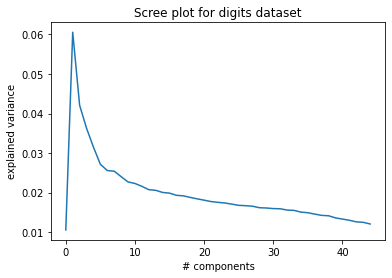

In [810]:
n_components = int(math.ceil((text.shape[0]*0.75) / 5.0) * 5.0)
lsa = TruncatedSVD(n_components)
doc_topic = lsa.fit_transform(tfidf)
plt.plot(lsa.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

In [813]:
index = []
for n in range(n_components):
    index.append('topic_{}'.format(n)) 
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = index,
             columns = vectorizer.get_feature_names())
topic_word

aarhus  aaroe  aaron  abandon  abandoned  abandoning  abandonment  \
topic_0    0.001  0.001  0.002    0.003      0.006       0.001        0.002   
topic_1   -0.000 -0.000 -0.004    0.003      0.007      -0.000       -0.000   
topic_2    0.004  0.004 -0.004    0.002      0.006       0.004       -0.000   
topic_3   -0.001 -0.001 -0.002   -0.008     -0.012      -0.001       -0.002   
topic_4   -0.000 -0.000 -0.014    0.003     -0.001      -0.000        0.007   
topic_5   -0.003 -0.003  0.008    0.001     -0.000      -0.003        0.001   
topic_6   -0.006 -0.006 -0.010    0.003     -0.004      -0.006        0.000   
topic_7    0.003  0.003 -0.006   -0.005      0.004       0.003       -0.002   
topic_8    0.006  0.006 -0.003    0.005     -0.007       0.006       -0.003   
topic_9   -0.001 -0.001  0.004   -0.001      0.006      -0.001        0.004   
topic_10  -0.001 -0.001 -0.008    0.005      0.007      -0.001        0.001   
topic_11   0.009  0.009  0.018    0.002     -0.003       0.009        0.002   
topic_12   0.000  0.000 -0.007   -0.002      0.011       0.000       -0.008   
topic_13   0.001  0.001  0.000    0.000      0.003       0.001        0.002   
topic_14  -0.005 -0.005 -0.005    0.007      0.024      -0.005       -0.004   
topic_15  -0.008 -0.008 -0.005    0.002     -0.003      -0.008       -0.006   
topic_16   0.004  0.004  0.012   -0.002      0.036       0.004       -0.001   
topic_17   0.003  0.003 -0.014   -0.000      0.006       0.003        0.003   
topic_18  -0.002 -0.002  0.005   -0.003     -0.003      -0.002        0.002   
topic_19  -0.001 -0.001 -0.009   -0.001      0.002      -0.001        0.002   
topic_20   0.001  0.001  0.019    0.002      0.012       0.001       -0.001   
topic_21  -0.001 -0.001 -0.000   -0.001      0.010      -0.001       -0.004   
topic_22  -0.004 -0.004  0.030   -0.001     -0.005      -0.004       -0.007   
topic_23   0.002  0.002  0.005   -0.005     -0.001       0.002        0.010   
topic_24   0.012  0.012 -0.017    0.001     -0.014       0.012       -0.004   
topic_25   0.009  0.009 -0.013    0.004      0.002       0.009       -0.002   
topic_26  -0.002 -0.002  0.015    0.007     -0.012      -0.002        0.014   
topic_27  -0.008 -0.008  0.018    0.007     -0.020      -0.008       -0.004   
topic_28  -0.003 -0.003 -0.003   -0.002      0.014      -0.003        0.008   
topic_29   0.005  0.005  0.017   -0.000      0.003       0.005        0.003   
topic_30  -0.010 -0.010 -0.008    0.000     -0.001      -0.010       -0.002   
topic_31  -0.005 -0.005 -0.024    0.002      0.010      -0.005        0.001   
topic_32   0.000  0.000  0.014    0.006      0.014       0.000       -0.013   
topic_33  -0.002 -0.002  0.008    0.004     -0.002      -0.002       -0.002   
topic_34   0.001  0.001  0.001   -0.005     -0.012       0.001       -0.008   
topic_35   0.001  0.001  0.005    0.003     -0.007       0.001        0.007   
topic_36  -0.004 -0.004  0.001    0.002      0.003      -0.004        0.011   
topic_37  -0.001 -0.001  0.004   -0.003      0.016      -0.001       -0.011   
topic_38   0.003  0.003 -0.005    0.000     -0.017       0.003       -0.004   
topic_39  -0.005 -0.005 -0.006    0.002      0.010      -0.005       -0.001   
topic_40   0.003  0.003 -0.001    0.004     -0.013       0.003       -0.015   
topic_41  -0.002 -0.002  0.003    0.017      0.000      -0.002        0.015   
topic_42  -0.001 -0.001  0.008   -0.008     -0.002      -0.001       -0.006   
topic_43   0.001  0.001 -0.004    0.010      0.002       0.001       -0.014   
topic_44  -0.005 -0.005 -0.000    0.002     -0.001      -0.005       -0.004   

            abc  ability  abject  ...   yuan  yugoslavia  zakaria  zealand  \
topic_0   0.002    0.009   0.002  ...  0.006       0.002    0.002    0.001   
topic_1  -0.002   -0.004  -0.002  ...  0.014       0.000    0.004   -0.001   
topic_2  -0.002    0.020  -0.002  ... -0.003       0.001   -0.000   -0.002   
topic_3  -0.000    0.003  -0.000  ...  0.002      -0.001   -0.0

In [814]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
mr, trump, said, china, president, state, republican, north, russia, would

Topic  1
china, korea, north, trump, xi, currency, trade, chinese, president, beijing

Topic  2
republican, democrat, party, governor, carolina, district, cooper, voter, election, thompson

Topic  3
china, taiwan, mr, north, korea, chinese, xi, beijing, state, carolina

Topic  4
goldman, cohn, mr, trump, subsidy, tax, street, wall, rate, yellen

Topic  5
intelligence, said, page, russian, agency, rate, street, journal, source, investigation

Topic  6
north, think, korea, mr, afghanistan, message, problem, know, bomb, he

Topic  7
kansa, thompson, party, special, district, korea, congressional, election, estes, afghanistan

Topic  8
spicer, said, thing, identity, think, job, mcconnell, munoz, party, taiwan

Topic  9
said, obamacare, job, sprint, subsidy, taiwan, healthcare, congress, united, schumer

Topic  10
mulvaney, budget, caucus, trump, republican, hall, china, town, constituent, yoho

Topic  11


In [815]:
doc_topic = pd.DataFrame(doc_topic.round(5),
             index = doc_topic2.index,
             columns = index)

doc_topic['topic'] = doc_topic.idxmax(axis=1).to_frame()
doc_topic['content'] = doc_topic2['content'].values
doc_topic['content_processed'] = doc_topic2['content_processed'].values
doc_topic

topic_0  topic_1  topic_2  \
title                                                                           
Trump’s Shift on Russia Brings Geopolitical Whi...  0.59484 -0.24466 -0.20868   
U.S. Takes Sharper Tone on Russia’s Role in Syr...  0.58703 -0.20812 -0.25779   
Trump Faces the Limits of American Power - The ...  0.29474  0.00899  0.04570   
Trump Reversals Hint at Wall Street Wing’s Sway...  0.49059 -0.03297 -0.00602   
After Campaign Exit, Manafort Borrowed From Bus...  0.36677 -0.31219 -0.18037   
Court Approved Wiretap on Trump Campaign Aide O...  0.43488 -0.29892 -0.24231   
Suburban G.O.P. Voters Sour on Party, Raising R...  0.48634 -0.27622  0.31968   
A Republican Wins in Kansas. It’s Still a Loss ...  0.27452 -0.18502  0.37094   
Why ‘Sorry’ Is Still the Hardest Word - The New...  0.33299 -0.14439 -0.10518   
Why Americans Vote ‘Against Their Interest’: Pa...  0.28933 -0.04731  0.26105   
Rodrigo Duterte Says Donald Trump Endorses His ...  0.38905 -0.21457 -0.17463   
After Bitter Campaign, Election Positions Trump...  0.35213 -0.14775  0.24963   
Rallying in North Carolina, Donald Trump Formal...  0.47398 -0.12413 -0.00093   
Donald Trump Says His Company Will Do ‘No New D...  0.47503 -0.11956 -0.15793   
If Donald Trump Pushes on Taiwan, How China Cou...  0.47991  0.23266 -0.18376   
Trump Lines Up Establishment Republicans to Vou...  0.47402 -0.32618 -0.14042   
Trump Is Said to Offer Interior Job to Ryan Zin...  0.30707 -0.23415 -0.11422   
U.S. Faces Tall Hurdles in Detaining or Deterri...  0.27256 -0.17155 -0.12453   
Obama Says U.S. Will Retaliate for Russia’s Ele...  0.55166 -0.30768 -0.17734   
North Carolina’s Partisan Rift Widens in Fight ...  0.35133 -0.26604  0.47173   
Clinton Says ‘Personal Beef’ by Putin Led to Ha...  0.33293 -0.24764 -0.05986   
Trump Picks Mick Mulvaney, South Carolina Congr...  0.28117 -0.21066  0.10639   
Donald Trump, Seeking Ambassadors, Sorts Throug...  0.48572 -0.21624 -0.11301   
Trump Takes Credit for Sprint Plan to Add 5,000...  0.31440 -0.08413 -0.09208   
China Sees New Ambiguity With Donald Trump’s Ta...  0.45546  0.13298 -0.17155   
Donald Trump Summons Tech Leaders to a Round-Ta...  0.35264 -0.15717 -0.11018   
Trump Taps Peter Navarro, Vocal Critic of China...  0.50182 -0.19168 -0.21426   
Battle Lines Turn North Carolina’s Moderation I...  0.35310 -0.17105  0.52977   
North Carolina Governor Signs Law Limiting Succ...  0.34211 -0.24249  0.46614   
Goldman Sachs to Extend Its Reach in Trump Admi...  0.37622 -0.22142 -0.12025   
Trump Says He Likes Janet Yellen and Supports t...  0.33276  0.15570 -0.01729   
McConnell: Trump Is ’Learning the Job’ - Breitbart  0.26220  0.16957  0.04822   
Trump on ’Mother of All Bombs’: I Don’t Know If...  0.27521  0.34731  0.07390   
John Bolton: Only Way to End North Korea’s Nucl...  0.34945  0.22592  0.04790   
Trump: I’ll Make ’Not as Good a Trade Deal’ if ...  0.43566  0.46137 -0.02499   
Trump and China: Master diplomat or paper tiger?    0.43221  0.44591 -0.06500   
Trump just did a backflip on two major campaign...  0.49571  0.39985 -0.03198   
The Atlantic  Politics & Policy Daily: Foreign ...  0.32969  0.03334  0.10385   
Sean Spicer Throws In the Towel                     0.30498  0.17848 -0.01092   
The Education of Donald J. Trump                    0.46169  0.30200  0.09427   
All the President’s Flip-Flops                      0.58133  0.28701 -0.03166   
 What’s Going On In The News Today?                 0.24799  0.00111 -0.04559   
Trump’s Syria Strike Was Constitutional             0.23546  0.03165  0.15546   
Trump threatens to pull financing for ObamaCare     0.26399  0.04549  0.19427   
Does White House shake-up mean a sharp left turn?   0.30803  0.09724  0.16269   
The Democratic party is undermining Bernie Sand...  0.27509 -0.05787  0.38329   
British spies were first to spot Trump team’s l...  0.31488 -0.07261 -0.14373   
Trump’s Latest String Of Flip-Flops Won’t Hurt ...  0.41710  0.24672  0.16570   
’T

In [816]:
doc_topic['topic'].value_counts()[:25]

topic_0     26
topic_2      4
topic_1      3
topic_10     2
topic_13     2
topic_15     2
topic_14     1
topic_9      1
topic_31     1
topic_30     1
topic_19     1
topic_33     1
topic_22     1
topic_12     1
topic_21     1
topic_20     1
topic_16     1
topic_6      1
topic_11     1
topic_5      1
topic_4      1
topic_38     1
topic_7      1
Name: topic, dtype: int64

In [817]:
doc_topic[doc_topic['topic'] == 'topic_0']['topic_0'].sort_values()

title
Does White House shake-up mean a sharp left turn?                                                                  0.30803
John Bolton: Only Way to End North Korea’s Nuclear Weapons Program Is to ‘End the North’                           0.34945
Donald Trump Summons Tech Leaders to a Round-Table Meeting - The New York Times                                    0.35264
Goldman Sachs to Extend Its Reach in Trump Administration - The New York Times                                     0.37622
Rodrigo Duterte Says Donald Trump Endorses His Violent Antidrug Campaign - The New York Times                      0.38905
Obama said there was never a better time to be alive. Trump thinks a ‘nasty’ world offers nothing but problems.    0.39238
Trump gets a taste of success                                                                                      0.39331
Trump’s Latest String Of Flip-Flops Won’t Hurt Him (At Least For Now)                                              0.41710
Trump back

In [818]:
doc_topic[doc_topic['topic'] == 'topic_2']['topic_2'].sort_values()

title
The Democratic party is undermining Bernie Sanders-style candidates                           0.38329
North Carolina Governor Signs Law Limiting Successor’s Power - The New York Times             0.46614
North Carolina’s Partisan Rift Widens in Fight Over Governor’s Powers - The New York Times    0.47173
Battle Lines Turn North Carolina’s Moderation Into a Distant Memory - The New York Times      0.52977
Name: topic_2, dtype: float64

### Round 3

In [820]:
#Redo topic modeling on topics where article counts > number of publications reported for that day
topic_counts = doc_topic['topic'].value_counts()
overloaded_topics = topic_counts[topic_counts > n_publications].index.tolist()

In [821]:
doc_topic2 = doc_topic[doc_topic['topic'].isin(overloaded_topics)][['content', 'content_processed']]

In [822]:
text = doc_topic2['content_processed']
text.shape

(26,)

In [823]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(text)

In [833]:
int(math.ceil((text.shape[0]*0.75) / 5.0) * 5.0)

20

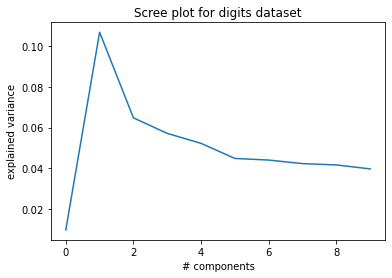

In [855]:
n_components = 10
lsa = TruncatedSVD(n_components)
doc_topic = lsa.fit_transform(tfidf)
plt.plot(lsa.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

In [858]:
index = []
for n in range(n_components):
    index.append('topic_{}'.format(n)) 
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = index,
             columns = vectorizer.get_feature_names())
topic_word

abandon  abandoned  abandonment  ability   able  abolish  abortion  \
topic_0    0.003      0.005        0.003    0.009  0.004    0.003     0.003   
topic_1    0.006      0.013        0.000    0.009  0.010    0.006     0.006   
topic_2   -0.005     -0.005       -0.000   -0.012  0.008   -0.005    -0.010   
topic_3   -0.004     -0.004       -0.008   -0.010 -0.001   -0.004    -0.015   
topic_4    0.003     -0.000        0.007   -0.013  0.019    0.003    -0.023   
topic_5   -0.007     -0.008       -0.000    0.005 -0.003   -0.007    -0.002   
topic_6    0.000     -0.014        0.002    0.008  0.002    0.000    -0.011   
topic_7   -0.007     -0.015        0.004   -0.024  0.009   -0.007     0.032   
topic_8   -0.009      0.006       -0.009    0.015  0.005   -0.009     0.007   
topic_9   -0.001      0.002       -0.009    0.004 -0.002   -0.001     0.012   

         abounds  abrams  abroad  ...  youll  young  younger  youre  youve  \
topic_0    0.004   0.007   0.008  ...  0.002  0.002    0.007  0.011  0.003   
topic_1    0.009   0.013   0.004  ... -0.002  0.005   -0.006  0.028 -0.005   
topic_2   -0.008  -0.009   0.012  ... -0.002  0.001    0.008  0.004 -0.005   
topic_3   -0.001  -0.009   0.014  ... -0.004  0.007    0.006 -0.005  0.007   
topic_4   -0.009   0.005  -0.007  ... -0.002 -0.001   -0.008  0.021  0.001   
topic_5    0.018  -0.014  -0.026  ... -0.013 -0.017    0.005  0.001 -0.001   
topic_6    0.004   0.000   0.031  ... -0.004  0.020   -0.007 -0.013 -0.007   
topic_7   -0.002  -0.014   0.009  ... -0.007  0.004   -0.005 -0.002  0.000   
topic_8   -0.010  -0.017  -0.029  ... -0.003 -0.019    0.002  0.024 -0.002   
topic_9   -0.004  -0.001   0.018  ... -0.008  0.016   -0.001 -0.001  0.003   

          yuan  zakaria  zenefits    zip   zone  
topic_0  0.005    0.003     0.003  0.003  0.003  
topic_1  0.011    0.007    -0.003 -0.003  0.007  
topic_2  0.004   -0.005    -0.001 -0.001  0.008  
topic_3 -0.002    0.003    -0.008 -0.008 -0.004  
topic_4  0.025   -0.009    -0.000 -0.000  0.021  
topic_5  0.006    0.029     0.001  0.001  0.003  
topic_6 -0.009    0.014     0.018  0.018 -0.005  
topic_7  0.007   -0.008    -0.012 -0.012  0.009  
topic_8  0.010   -0.010     0.026  0.026  0.009  
topic_9 -0.001   -0.007     0.016  0.016 -0.002  

[10 rows x 4114 columns]

In [859]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
mr, trump, said, china, president, russia, would, state, policy, campaign

Topic  1
trump, china, currency, korea, north, president, bannon, much, rate, policy

Topic  2
taiwan, china, beijing, chinese, iran, trade, tsai, said, call, united

Topic  3
russia, weapon, chemical, putin, bolton, moscow, russian, think, nuclear, syria

Topic  4
rate, said, currency, journal, manipulator, dollar, wednesday, page, low, yellen

Topic  5
trump, bannon, team, kennedy, russia, tension, success, syria, xi, first

Topic  6
tech, valley, silicon, duterte, weapon, bolton, world, thiel, said, threat

Topic  7
goldman, cohn, weapon, financial, bolton, ivanka, doesnt, sachs, rate, white

Topic  8
tech, valley, silicon, weapon, bolton, thiel, think, apple, chemical, north

Topic  9
page, tech, valley, silicon, intelligence, news, official, wiretap, trump, obama


In [860]:
doc_topic_test = pd.DataFrame(doc_topic.round(5),
             index = doc_topic2.index,
             columns = index)

doc_topic_test['topic'] = doc_topic_test.idxmax(axis=1).to_frame()
doc_topic_test['content'] = doc_topic2['content'].values
doc_topic_test['content_processed'] = doc_topic2['content_processed'].values
doc_topic_test

topic_0  topic_1  topic_2  \
title                                                                           
Trump’s Shift on Russia Brings Geopolitical Whi...  0.66040 -0.23722 -0.21785   
U.S. Takes Sharper Tone on Russia’s Role in Syr...  0.64899 -0.23288 -0.20162   
Trump Reversals Hint at Wall Street Wing’s Sway...  0.51337  0.01270 -0.00479   
Court Approved Wiretap on Trump Campaign Aide O...  0.46348 -0.31998 -0.10522   
Suburban G.O.P. Voters Sour on Party, Raising R...  0.48164 -0.18663 -0.10025   
Rodrigo Duterte Says Donald Trump Endorses His ...  0.46675 -0.29273  0.15167   
Donald Trump Says His Company Will Do ‘No New D...  0.52777 -0.14278  0.02849   
If Donald Trump Pushes on Taiwan, How China Cou...  0.50574  0.06447  0.65556   
Trump Lines Up Establishment Republicans to Vou...  0.54319 -0.37676 -0.02714   
Obama Says U.S. Will Retaliate for Russia’s Ele...  0.59246 -0.32183 -0.17508   
Donald Trump, Seeking Ambassadors, Sorts Throug...  0.54689 -0.23501 -0.03013   
China Sees New Ambiguity With Donald Trump’s Ta...  0.49327 -0.00172  0.63745   
Donald Trump Summons Tech Leaders to a Round-Ta...  0.40847 -0.18750 -0.02057   
Trump Taps Peter Navarro, Vocal Critic of China...  0.57088 -0.29129  0.11322   
Goldman Sachs to Extend Its Reach in Trump Admi...  0.44705 -0.29761 -0.01690   
John Bolton: Only Way to End North Korea’s Nucl...  0.32524  0.24151 -0.05986   
Trump just did a backflip on two major campaign...  0.48208  0.41012  0.20387   
The Education of Donald J. Trump                    0.44765  0.39831 -0.15775   
All the President’s Flip-Flops                      0.58221  0.40734 -0.13250   
Does White House shake-up mean a sharp left turn?   0.31290  0.24125 -0.22872   
Trump’s Latest String Of Flip-Flops Won’t Hurt ...  0.40211  0.38529 -0.05756   
Trump backs away from labeling China a currency...  0.40810  0.33702  0.23474   
Trump as a ‘conventional Republican’? That’s wh...  0.53644  0.33865 -0.14800   
We don’t know where Trump stands. Neither does he.  0.45770  0.34947 -0.18550   
Trump gets a taste of success                       0.38977  0.30788 -0.12537   
Obama said there was never a better time to be ...  0.39097  0.25114  0.02483   

                                                    topic_3  topic_4  topic_5  \
title                                                                           
Trump’s Shift on Russia Brings Geopolitical Whi...  0.32638  0.03491  0.03274   
U.S. Takes Sharper Tone on Russia’s Role in Syr...  0.36632  0.05367  0.10243   
Trump Reversals Hint at Wall Street Wing’s Sway... -0.26280  0.19545 -0.00529   
Court Approved Wiretap on Trump Campaign Aide O...  0.10455  0.16738  0.08038   
Suburban G.O.P. Voters Sour on Party, Raising R... -0.17626 -0.06002 -0.44089   
Rodrigo Duterte Says Donald Trump Endorses His ...  0.00337 -0.03425 -0.02371   
Donald Trump Says His Company Will Do ‘No New D... -0.09018  0.07519  0.02591   
If Donald Trump Pushes on Taiwan, How China Cou...  0.11285 -0.23755  0.04464   
Trump Lines Up Establishment Republicans to Vou...  0.04156 -0.03039 -0.01271   
Obama Says U.S. Will Retaliate for Russia’s Ele...  0.23285  0.03242 -0.03504   
Donald Trump, Seeking Ambassadors, Sorts Throug... -0.22847 -0.07113  0.05978   
China Sees New Ambiguity With Donald Trump’s Ta...  0.12309 -0.27207  0.05507   
Donald Trump Summons Tech Leaders to a Round-Ta... -0.23003 -0.00073  0.01322   
Trump Taps Peter Navarro, Vocal Critic of China... -0.23867  0.06283  0.07156   
Goldman Sachs to Extend Its Reach in Trump Admi... -0.33574 -0.10439  0.01652   
John Bolton: Only Way to End North Korea’s Nucl...  0.48336 -0.15585 -0.24856   
Trump just did a backflip on two major campaign... -0.02231  0.36514 -0.04901   
The Education of Donald J. Trump                   -0.01636 -0.15742  0.01786   
All the President’s Flip-Flops                      0.03408  0.23169  0.09112   
Does White House shake-up mean a sharp left turn?  -0.30357 -0.44393 -0.03536   
T

In [861]:
doc_topic_test['topic'].value_counts()[:25]

topic_0    18
topic_2     2
topic_8     1
topic_3     1
topic_7     1
topic_6     1
topic_5     1
topic_4     1
Name: topic, dtype: int64

In [862]:
doc_topic_test[doc_topic_test['topic'] == 'topic_0']['topic_0'].sort_values()

title
Trump’s Latest String Of Flip-Flops Won’t Hurt Him (At Least For Now)                            0.40211
Goldman Sachs to Extend Its Reach in Trump Administration - The New York Times                   0.44705
The Education of Donald J. Trump                                                                 0.44765
We don’t know where Trump stands. Neither does he.                                               0.45770
Court Approved Wiretap on Trump Campaign Aide Over Russia Ties - The New York Times              0.46348
Rodrigo Duterte Says Donald Trump Endorses His Violent Antidrug Campaign - The New York Times    0.46675
Suburban G.O.P. Voters Sour on Party, Raising Republican Fears for 2018 - The New York Times     0.48164
Trump just did a backflip on two major campaign promises                                         0.48208
Trump Reversals Hint at Wall Street Wing’s Sway in White House - The New York Times              0.51337
Donald Trump Says His Company Will Do ‘No New Dea

In [863]:
doc_topic_test[doc_topic_test['topic'] == 'topic_2']['topic_2']

title
If Donald Trump Pushes on Taiwan, How China Could Push Back - The New York Times    0.65556
China Sees New Ambiguity With Donald Trump’s Taiwan Call - The New York Times       0.63745
Name: topic_2, dtype: float64

### Round 4

In [865]:
#Redo topic modeling on topics where article counts > number of publications reported for that day
topic_counts = doc_topic_test['topic'].value_counts()
overloaded_topics = topic_counts[topic_counts > n_publications].index.tolist()

In [866]:
doc_topic2 = doc_topic_test[doc_topic_test['topic'].isin(overloaded_topics)][['content', 'content_processed']]

In [867]:
text = doc_topic2['content_processed']
text.shape

(18,)

In [868]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(text)

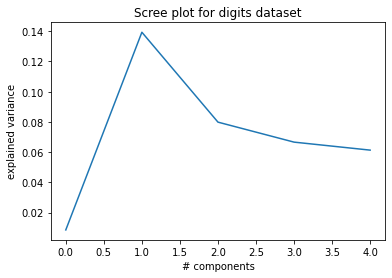

In [880]:
n_components = 5
lsa = TruncatedSVD(n_components)
doc_topic = lsa.fit_transform(tfidf)
plt.plot(lsa.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

In [883]:
index = []
for n in range(n_components):
    index.append('topic_{}'.format(n)) 
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = index,
             columns = vectorizer.get_feature_names())
topic_word

abandon  abandoned  abandonment  ability   able  abolish  abounds  \
topic_0    0.004      0.006        0.003    0.008  0.004    0.004    0.005   
topic_1    0.009      0.016        0.002    0.017  0.012    0.009    0.012   
topic_2   -0.003      0.000       -0.010    0.003 -0.005   -0.003    0.005   
topic_3    0.001      0.013       -0.006    0.014 -0.016    0.001   -0.007   
topic_4   -0.000      0.003       -0.009   -0.008  0.015   -0.000   -0.006   

         abrams  abroad  abrupt  ...  yammering   year  yellen    yet   york  \
topic_0   0.008   0.003   0.004  ...      0.005  0.040   0.018  0.017  0.030   
topic_1   0.018  -0.006  -0.003  ...      0.012  0.006   0.036  0.017 -0.008   
topic_2  -0.005  -0.001   0.013  ...      0.005  0.012  -0.011 -0.020 -0.019   
topic_3   0.003   0.002   0.001  ...     -0.007  0.032  -0.017  0.000 -0.007   
topic_4  -0.001   0.004  -0.002  ...     -0.006 -0.018   0.000 -0.028  0.005   

         youll  younger  youre  youve   yuan  
topic_0  0.002    0.007  0.010  0.004  0.003  
topic_1 -0.002   -0.006  0.032 -0.005  0.008  
topic_2 -0.005    0.005  0.002  0.010  0.004  
topic_3  0.018    0.005 -0.003  0.005 -0.006  
topic_4  0.003   -0.000  0.001 -0.004 -0.000  

[5 rows x 3193 columns]

In [884]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
mr, trump, said, russia, president, republican, china, putin, campaign, would

Topic  1
trump, china, korea, currency, president, north, much, policy, actually, bannon

Topic  2
russia, putin, moscow, russian, intelligence, page, chemical, syria, attack, nato

Topic  3
republican, voter, district, party, race, vote, rating, mckinnon, percent, seat

Topic  4
duterte, drug, said, call, police, philippine, united, trade, state, antidrug


In [885]:
doc_topic_test = pd.DataFrame(doc_topic.round(5),
             index = doc_topic2.index,
             columns = index)

doc_topic_test['topic'] = doc_topic_test.idxmax(axis=1).to_frame()
doc_topic_test['content'] = doc_topic2['content'].values
doc_topic_test['content_processed'] = doc_topic2['content_processed'].values
doc_topic_test

topic_0  topic_1  topic_2  \
title                                                                           
Trump’s Shift on Russia Brings Geopolitical Whi...  0.69135 -0.18518  0.39849   
U.S. Takes Sharper Tone on Russia’s Role in Syr...  0.67392 -0.18985  0.42149   
Trump Reversals Hint at Wall Street Wing’s Sway...  0.53233  0.08634 -0.29228   
Court Approved Wiretap on Trump Campaign Aide O...  0.49894 -0.28750  0.21185   
Suburban G.O.P. Voters Sour on Party, Raising R...  0.50488 -0.12091 -0.18844   
Rodrigo Duterte Says Donald Trump Endorses His ...  0.47831 -0.26524 -0.15705   
Donald Trump Says His Company Will Do ‘No New D...  0.54051 -0.09032 -0.12612   
Trump Lines Up Establishment Republicans to Vou...  0.56405 -0.34822 -0.01291   
Obama Says U.S. Will Retaliate for Russia’s Ele...  0.62713 -0.27099  0.31755   
Donald Trump, Seeking Ambassadors, Sorts Throug...  0.57050 -0.17086 -0.24633   
Trump Taps Peter Navarro, Vocal Critic of China...  0.58852 -0.20912 -0.33706   
Goldman Sachs to Extend Its Reach in Trump Admi...  0.45464 -0.26265 -0.38063   
Trump just did a backflip on two major campaign...  0.45407  0.44049 -0.11127   
The Education of Donald J. Trump                    0.44836  0.48706  0.09143   
All the President’s Flip-Flops                      0.58657  0.46776  0.15347   
Trump’s Latest String Of Flip-Flops Won’t Hurt ...  0.39999  0.46444 -0.09306   
Trump as a ‘conventional Republican’? That’s wh...  0.54980  0.42017 -0.07123   
We don’t know where Trump stands. Neither does he.  0.46330  0.40353  0.09657   

                                                    topic_3  topic_4    topic  \
title                                                                           
Trump’s Shift on Russia Brings Geopolitical Whi...  0.02171 -0.04703  topic_0   
U.S. Takes Sharper Tone on Russia’s Role in Syr... -0.08546  0.00179  topic_0   
Trump Reversals Hint at Wall Street Wing’s Sway... -0.14931 -0.18978  topic_0   
Court Approved Wiretap on Trump Campaign Aide O... -0.05091 -0.12226  topic_0   
Suburban G.O.P. Voters Sour on Party, Raising R...  0.60763  0.08713  topic_3   
Rodrigo Duterte Says Donald Trump Endorses His ... -0.09046  0.55650  topic_4   
Donald Trump Says His Company Will Do ‘No New D... -0.21402  0.10600  topic_0   
Trump Lines Up Establishment Republicans to Vou...  0.07934  0.09678  topic_0   
Obama Says U.S. Will Retaliate for Russia’s Ele...  0.10638 -0.07630  topic_0   
Donald Trump, Seeking Ambassadors, Sorts Throug...  0.11931  0.05105  topic_0   
Trump Taps Peter Navarro, Vocal Critic of China... -0.20774  0.02763  topic_0   
Goldman Sachs to Extend Its Reach in Trump Admi... -0.07210 -0.54428  topic_0   
Trump just did a backflip on two major campaign... -0.29029  0.25026  topic_0   
The Education of Donald J. Trump                    0.12137 -0.12553  topic_1   
All the President’s Flip-Flops                     -0.14477 -0.01171  topic_0   
Trump’s Latest String Of Flip-Flops Won’t Hurt ...  0.42834  0.05389  topic_1   
Trump as a ‘conventional Republican’? That’s wh...  0.03913 -0.01368  topic_0   
We don’t know where Trump stands. Neither does he. -0.11956 -0.09354  topic_0   

                                                                                              content  \
title                                                                                                   
Trump’s Shift on Russia Brings Geopolitical Whi...  WASHINGTON     A week ago, President Trump was...   
U.S. Takes Sharper Tone on Russia’s Role in Syr...  WASHINGTON     President Trump and Secretary o...   
Trump Reversals Hint at Wall Street Wing’s Sway...  WASHINGTON     President Trump made three star...   
Court Approved Wiretap on Trump Campaign Aide O...  WASHINGTON     The Justice Department obtained...   
Suburban G.O.P. Voters Sour on Party, Raising R...  ALPHARETTA, Ga.     A gray mood has settled ov...   
Rodrigo Duterte Says Donald Trump Endorses His ...  MANILA     President Ro

In [886]:
doc_topic_test['topic'].value_counts()[:25]

topic_0    14
topic_1     2
topic_4     1
topic_3     1
Name: topic, dtype: int64

In [889]:
doc_topic_test[doc_topic_test['topic'] == 'topic_0']['topic_0'].sort_values()

title
Trump just did a backflip on two major campaign promises                                      0.45407
Goldman Sachs to Extend Its Reach in Trump Administration - The New York Times                0.45464
We don’t know where Trump stands. Neither does he.                                            0.46330
Court Approved Wiretap on Trump Campaign Aide Over Russia Ties - The New York Times           0.49894
Trump Reversals Hint at Wall Street Wing’s Sway in White House - The New York Times           0.53233
Donald Trump Says His Company Will Do ‘No New Deals’ During His Term - The New York Times     0.54051
Trump as a ‘conventional Republican’? That’s what some in GOP establishment say they see.     0.54980
Trump Lines Up Establishment Republicans to Vouch for Rex Tillerson - The New York Times      0.56405
Donald Trump, Seeking Ambassadors, Sorts Through Competing Priorities - The New York Times    0.57050
All the President’s Flip-Flops                                              

In [890]:
doc_topic_test[doc_topic_test['topic'] == 'topic_1']['topic_1']

title
The Education of Donald J. Trump                                         0.48706
Trump’s Latest String Of Flip-Flops Won’t Hurt Him (At Least For Now)    0.46444
Name: topic_1, dtype: float64

## 2017-07-03 (56 articles)

In [1162]:
date = '2017-07-03'
text = df[df.date==date]['content_processed']
text.shape

(56,)

In [988]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(text)

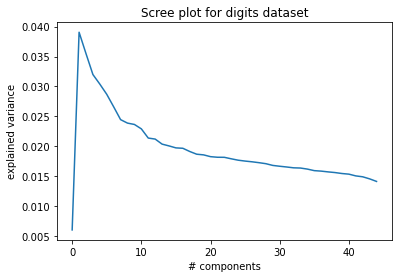

In [989]:
n_components = int(math.ceil((text.shape[0]*0.75) / 5.0) * 5.0)
lsa = TruncatedSVD(n_components)
doc_topic = lsa.fit_transform(tfidf)
plt.plot(lsa.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

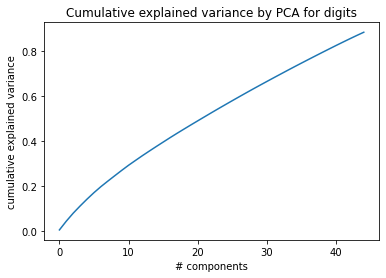

In [990]:
plt.plot(np.cumsum(lsa.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for digits');

In [991]:
index = []
for n in range(n_components):
    index.append('topic_{}'.format(n)) 

topic_word = pd.DataFrame(lsa.components_.round(3),
             index = index,
             columns = vectorizer.get_feature_names())

In [992]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
trump, said, percent, state, would, president, new, year, election, company

Topic  1
percent, bank, rose, sale, index, crude, highest, company, construction, billion

Topic  2
christie, beach, park, governor, state, budget, shutdown, family, jersey, island

Topic  3
abe, ldp, tokyo, party, election, abes, minister, putin, seat, koikes

Topic  4
fox, horowitz, sport, abe, ldp, party, tokyo, abes, minister, allegation

Topic  5
fox, horowitz, sport, percent, crude, rose, bank, trump, output, construction

Topic  6
jefferson, wimbledon, kang, life, franklin, goddard, american, djokovic, agassi, break

Topic  7
putin, russia, russian, rule, state, meeting, syria, airport, ukraine, interference

Topic  8
danone, putin, fairfax, stonyfield, deal, glp, equity, domain, bid, westinghouse

Topic  9
bill, budget, airport, vote, senate, city, rule, airline, gop, mexico

Topic  10
bill, budget, putin, would, gop, jefferson, senate, medicaid, tax, russia

Topic  11
wimbledon, kang, djokov

In [993]:
index = []
for n in range(n_components):
    index.append('topic_{}'.format(n)) 

doc_topic = pd.DataFrame(doc_topic.round(5),
             index = df[df.date==date]['title'],
             columns = index)
doc_topic['topic'] = doc_topic.idxmax(axis=1).to_frame()
doc_topic['publication'] = df[df.date == date]['publication'].values
doc_topic['content'] = df[df.date == date]['content no nonascii'].values
doc_topic['content_processed'] = df[df.date == date]['content_processed'].values
doc_topic

topic_0  topic_1  topic_2  \
title                                                                           
Commentary: Seeking the truth, not the tragedy,...  0.31315 -0.09596 -0.11317   
Maine, New Jersey lawmakers scramble to end par...  0.36550 -0.18146  0.61667   
Japan PM’s party suffers historic defeat in Tok...  0.29871  0.06574  0.01340   
Japan PM seeks to regain public’s trust after T...  0.33978  0.12113  0.03142   
Australia’s Fairfax ends talks with PE suitors ...  0.25092  0.28092  0.00099   
Japan firms most upbeat in three years but labo...  0.26283  0.35491 -0.00414   
Global Logistic Properties receives bid proposa...  0.24081  0.27292 -0.00474   
Washington tells India Westinghouse could be so...  0.22943  0.09683 -0.03632   
Tower of human skulls in Mexico casts new light...  0.13172 -0.01245  0.03107   
Kang wins Women’s PGA Championship to make firs...  0.17596 -0.00035 -0.00009   
Exclusive: Dropbox seeks to hire IPO underwrite...  0.21907  0.25081  0.00927   
Trump praises veterans, hits media at Kennedy C...  0.34289 -0.24638 -0.23016   
Trump considering lawyer for White House Russia...  0.31166 -0.19404  0.03002   
U.S. no longer a ’friend’ in Merkel election pr...  0.29816 -0.03361 -0.07679   
Fox Sports dismisses president of national netw...  0.15536  0.02930 -0.04644   
New rules at Mexico City airport aim to ease fl...  0.16617  0.06053  0.01979   
Three more states refuse Trump commission’s vot...  0.35360 -0.17368  0.18505   
Chile campaign turns to battle for Pinera’s opp...  0.22684  0.02950 -0.01793   
Wall Street banks take on summer school: Invest...  0.25757  0.26166  0.02092   
Illinois Senate mulls fate of budget that would...  0.32804  0.01321  0.26286   
Venezuela opposition challenges Maduro with uno...  0.28272 -0.01098  0.05056   
Algeria to grant legal status to African migran...  0.19713  0.06989  0.00533   
Islamic State cornered in Mosul as Iraq prepare...  0.19910 -0.00398  0.06388   
Two top ’quant’ researchers exit BlackRock as i...  0.18286  0.23140  0.01256   
Family firm in Ukraine says it was not responsi...  0.19850  0.06056 -0.03034   
Last thing Djokovic needs is a break, says coac...  0.19663 -0.01316 -0.01610   
Venus breaks down in tears after win over Mertens   0.18708 -0.02767  0.05301   
U.S. auto sales fall for fourth straight month ...  0.21575  0.27914  0.00316   
Facebook fights U.S. gag order that it says chi...  0.29027  0.07675 -0.04009   
Global stocks, dollar, oil, treasury yields sta...  0.33338  0.46964  0.02389   
Oil rises more than 2 percent as U.S. crude out...  0.28166  0.40202  0.03233   
U.S. factory activity jumps to near three-year ...  0.30090  0.45011  0.01736   
Microsoft to reorganize sales and marketing teams   0.22093  0.15903 -0.02300   
Broadcom wins U.S. antitrust consent to buy Bro...  0.17230  0.14079  0.00164   
France’s Danone to sell Stonyfield to Lactalis ...  0.19780  0.28644  0.01005   
Federal court blocks Trump EPA on air pollution     0.26292 -0.00308 -0.11023   
The economy President Trump loves looks a lot l...  0.51533  0.04452 -0.15374   
Chris Christie enjoyed a closed beach, then got...  0.26808 -0.24958  0.67693   
The Greek tragedy that is Chris Christie’s poli...  0.29019 -0.25337  0.64134   
The problem with ‘But Trump’s base loves it!’       0.41919 -0.33794 -0.27017   
Why Trump wants a war on the media                  0.36757 -0.33140 -0.31656   
The speech I’d like to hear a Democrat give thi...  0.26325 -0.05734 -0.01460   
If this scam works as planned, Republicans coul...  0.38431 -0.11650 -0.00198   
CNN’s Jeffrey Lord outdoes himself in defending...  0.33858 -0.24342 -0.22020   
If Trump doesn’t raise election interference wi...  0.37460 -0.26449 -0.28228   
Jamie Horowitz fired as head of Fox Sports amid...  0.18194  0.00943 -0.04928   
Trump vows to help Charlie Gard, the terminally...  0.25885 -0.04990 -0.03183   
Justice Dept. compliance expert whose contract ...  0.27237 -0.08831 -0.13547   
It

In [994]:
doc_topic['topic'].value_counts()

topic_0     8
topic_1     4
topic_13    3
topic_11    3
topic_2     3
topic_14    2
topic_16    2
topic_8     2
topic_3     2
topic_7     2
topic_12    2
topic_4     2
topic_20    2
topic_40    1
topic_44    1
topic_19    1
topic_39    1
topic_18    1
topic_33    1
topic_32    1
topic_10    1
topic_27    1
topic_36    1
topic_9     1
topic_29    1
topic_15    1
topic_34    1
topic_17    1
topic_22    1
topic_21    1
topic_35    1
topic_24    1
Name: topic, dtype: int64

In [1473]:
doc_topic[doc_topic['topic'] == 'topic_0'].index

Index(['Commentary: Seeking the truth, not the tragedy, in journalism',
       'Three more states refuse Trump commission’s voter data request',
       'Facebook fights U.S. gag order that it says chills free speech',
       'The economy President Trump loves looks a lot like the one candidate Trump hated',
       'The problem with ‘But Trump’s base loves it!’',
       'Why Trump wants a war on the media',
       'If this scam works as planned, Republicans could still destroy Obamacare',
       'CNN’s Jeffrey Lord outdoes himself in defending Trump’s CNN-beating tweet'],
      dtype='object', name='title')

In [1460]:
topic_counts = doc_topic['topic'].value_counts()
topic_groups = topic_counts[topic_counts.values > 1]
doc_topic_groups = doc_topic[doc_topic['topic'].isin(topic_groups.index)]

In [1475]:
def find_pairwise_distances(topic):
    '''
    Calculates pairwise distances of articles in a topic group
    Returns the max pairwise distance of each article.
    **Will through error if a topic group of membership = 1
    is given as input**
    '''
    topic = doc_topic[doc_topic['topic'] == topic].select_dtypes('number').to_numpy()
    pca = PCA(n_components = 2)
    try:
        decom = pca.fit_transform(topic[:, :-1])
        return pairwise_distances(decom).max(axis=1)
    except:
        raise ValueError('There is only 1 member in this topic group. Pairwise distances can only be calculated with topic groups of membership > 1.')

def evaluate_topic_group_quality(topic_groups):
    '''
    Takes in a list of topic groups with membership > 1
    and evaluates whether the topic group is good or bad 
    quality.
    '''
    good_topic_groups = []
    bad_topic_groups = []

    for topic in topic_groups:
        max_distances = find_pairwise_distances(topic)
        if np.any(max_distances <= 1.25):
            good_topic_groups.append(topic)
        else:
            bad_topic_groups.append(topic)
        
    return good_topic_groups, bad_topic_groups

In [1474]:
find_pairwise_distances('topic_0')

array([28.02707448, 21.04004783, 40.01858081, 42.01541463, 42.00938702,
       42.00994124, 42.01929668, 42.01929668])

In [1476]:
good_topic_groups, bad_topic_groups = evaluate_topic_group_quality(topic_groups.index)

In [1477]:
doc_topic[doc_topic['topic'].isin(bad_topic_groups)]

topic_0  topic_1  topic_2  \
title                                                                           
Kang wins Women’s PGA Championship to make firs...  0.17596 -0.00035 -0.00009   
Trump considering lawyer for White House Russia...  0.31166 -0.19404  0.03002   
Algeria to grant legal status to African migran...  0.19713  0.06989  0.00533   
Family firm in Ukraine says it was not responsi...  0.19850  0.06055 -0.03034   
Last thing Djokovic needs is a break, says coac...  0.19663 -0.01316 -0.01610   
Venus breaks down in tears after win over Mertens   0.18708 -0.02767  0.05301   
Federal court blocks Trump EPA on air pollution     0.26292 -0.00308 -0.11023   
Trump vows to help Charlie Gard, the terminally...  0.25885 -0.04990 -0.03183   
Jefferson’s powerful last public letter reminds...  0.21913 -0.05965 -0.01496   
This woman’s name appears on the Declaration of...  0.20869 -0.05760 -0.00974   
The Founders definitely anticipated this            0.22578 -0.01226 -0.02971   
Strumming along Virginia’s Crooked Road             0.12243 -0.02183 -0.00542   

                                                    topic_3  topic_4  topic_5  \
title                                                                           
Kang wins Women’s PGA Championship to make firs...  0.00567  0.03862 -0.04085   
Trump considering lawyer for White House Russia... -0.02717 -0.07709 -0.00961   
Algeria to grant legal status to African migran...  0.09095  0.05326 -0.02035   
Family firm in Ukraine says it was not responsi... -0.05807  0.02583 -0.17268   
Last thing Djokovic needs is a break, says coac... -0.02991  0.02544 -0.06910   
Venus breaks down in tears after win over Mertens  -0.05348  0.02580 -0.04101   
Federal court blocks Trump EPA on air pollution    -0.01502 -0.02252 -0.10213   
Trump vows to help Charlie Gard, the terminally... -0.04479  0.01485 -0.05206   
Jefferson’s powerful last public letter reminds... -0.02117  0.03061 -0.04282   
This woman’s name appears on the Declaration of... -0.03018  0.03605 -0.04857   
The Founders definitely anticipated this           -0.03681  0.07137 -0.07175   
Strumming along Virginia’s Crooked Road            -0.02867  0.02345 -0.03425   

                                                    topic_6  topic_7  topic_8  \
title                                                                           
Kang wins Women’s PGA Championship to make firs...  0.29828 -0.04924  0.06188   
Trump considering lawyer for White House Russia... -0.26731  0.07572 -0.04126   
Algeria to grant legal status to African migran...  0.13402  0.17727  0.06918   
Family firm in Ukraine says it was not responsi...  0.00126  0.19151 -0.04828   
Last thing Djokovic needs is a break, says coac...  0.30615 -0.04965  0.08158   
Venus breaks down in tears after win over Mertens   0.28716  0.00768  0.05481   
Federal court blocks Trump EPA on air pollution     0.03139  0.16008 -0.10251   
Trump vows to help Charlie Gard, the terminally...  0.23215  0.04440 -0.10017   
Jefferson’s powerful last public letter reminds...  0.31378  0.02829 -0.02827   
This woman’s name appears on the Declaration of...  0.30601  0.00292 -0.05898   
The Founders definitely anticipated this            0.22386  0.00212 -0.12365   
Strumming along Virginia’s Crooked Road             0.20032  0.03780 -0.02012   

                                                    topic_9  ...  topic_40  \
title                                                        ...             
Kang wins Women’s PGA Championship to make firs... -0.05525  ...   0.19232   
Trump considering lawyer for White House Russia... -0.04526  ...   0.24489   
Algeria to grant legal status to African migran...  0.22291  ...  -0.01602   
Family firm in Ukraine says it was not responsi... -0.16178  ...  -0.01792   
Last thing Djokovic needs is a break, says coac... -0.07526  ...  -0.26535   
Venus breaks down in tears after win over Mertens  -0.14235  ...   0.04855   
Federal court blocks Tr

In [1493]:
g = doc_topic[doc_topic['topic'].isin(good_topic_groups)].reset_index().groupby('topic').title
list(g)

[('topic_0',
  0     Commentary: Seeking the truth, not the tragedy...
  8     Three more states refuse Trump commission’s vo...
  10    Facebook fights U.S. gag order that it says ch...
  15    The economy President Trump loves looks a lot ...
  18        The problem with ‘But Trump’s base loves it!’
  19                   Why Trump wants a war on the media
  20    If this scam works as planned, Republicans cou...
  21    CNN’s Jeffrey Lord outdoes himself in defendin...
  Name: title, dtype: object),
 ('topic_1',
  5     Japan firms most upbeat in three years but lab...
  11    Global stocks, dollar, oil, treasury yields st...
  12    Oil rises more than 2 percent as U.S. crude ou...
  13    U.S. factory activity jumps to near three-year...
  Name: title, dtype: object),
 ('topic_14',
  9     U.S. auto sales fall for fourth straight month...
  14    Microsoft to reorganize sales and marketing teams
  Name: title, dtype: object),
 ('topic_2',
  1     Maine, New Jersey lawmakers scramb

# Sentiment

Analyze only the artcles in good_topic_groups.

#### Sentiment score using entire article

In [308]:
def get_sentiment(content):
    vader = SentimentIntensityAnalyzer()
    return vader.polarity_scores(content)['compound'] 

In [1028]:
g['sentiment_score'] = g['content'].apply(get_sentiment)

<ipython-input-1028-c502d485d52f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g['sentiment_score'] = g['content'].apply(get_sentiment)


In [1031]:
g[g.topic == 'topic_0']['sentiment_score']

title
Commentary: Seeking the truth, not the tragedy, in journalism                       0.9694
Three more states refuse Trump commission’s voter data request                      0.9480
Facebook fights U.S. gag order that it says chills free speech                     -0.9300
The economy President Trump loves looks a lot like the one candidate Trump hated    0.9947
The problem with ‘But Trump’s base loves it!’                                      -0.9630
Why Trump wants a war on the media                                                 -0.9574
If this scam works as planned, Republicans could still destroy Obamacare           -0.9972
CNN’s Jeffrey Lord outdoes himself in defending Trump’s CNN-beating tweet          -0.8957
Name: sentiment_score, dtype: float64

#### Sentiment score using only 1st five lines of article

In [309]:
def get_intro_sentiment(text):
    vader = SentimentIntensityAnalyzer()
    sentiment_score = []
    for sentence in nltk.sent_tokenize(text)[:5]:
        sentiment_score.append(vader.polarity_scores(sentence)['compound'])
    return np.mean(sentiment_score)

In [1040]:
g[g.topic == 'topic_0']['content'].apply(get_intro_sentiment)

title
Commentary: Seeking the truth, not the tragedy, in journalism                      -0.43474
Three more states refuse Trump commission’s voter data request                     -0.00764
Facebook fights U.S. gag order that it says chills free speech                      0.26820
The economy President Trump loves looks a lot like the one candidate Trump hated   -0.18810
The problem with ‘But Trump’s base loves it!’                                      -0.02808
Why Trump wants a war on the media                                                 -0.21958
If this scam works as planned, Republicans could still destroy Obamacare            0.15698
CNN’s Jeffrey Lord outdoes himself in defending Trump’s CNN-beating tweet           0.20272
Name: content, dtype: float64

#### Sentiment score using first and last 5 lines of article

In [310]:
def get_intro_conclusion_sentiment(text):
    vader = SentimentIntensityAnalyzer()
    sentiment_score = []
    first_5 = ' '.join(nltk.sent_tokenize(text)[:5])
    last_5 = ' '.join(nltk.sent_tokenize(text)[-5:])
    sentences = [first_5, last_5]
    for sentence in sentences:
        sentiment_score.append(vader.polarity_scores(sentence)['compound'])
    return np.mean(sentiment_score)

In [1053]:
g[g.topic == 'topic_7']['content'].apply(get_intro_conclusion_sentiment)

title
If Trump doesn’t raise election interference with Putin, he’s inviting more in 2018    0.79875
What Trump needs to read before meeting Putin                                         -0.00360
Name: content, dtype: float64

# Hierarchical Clustering Dendogram

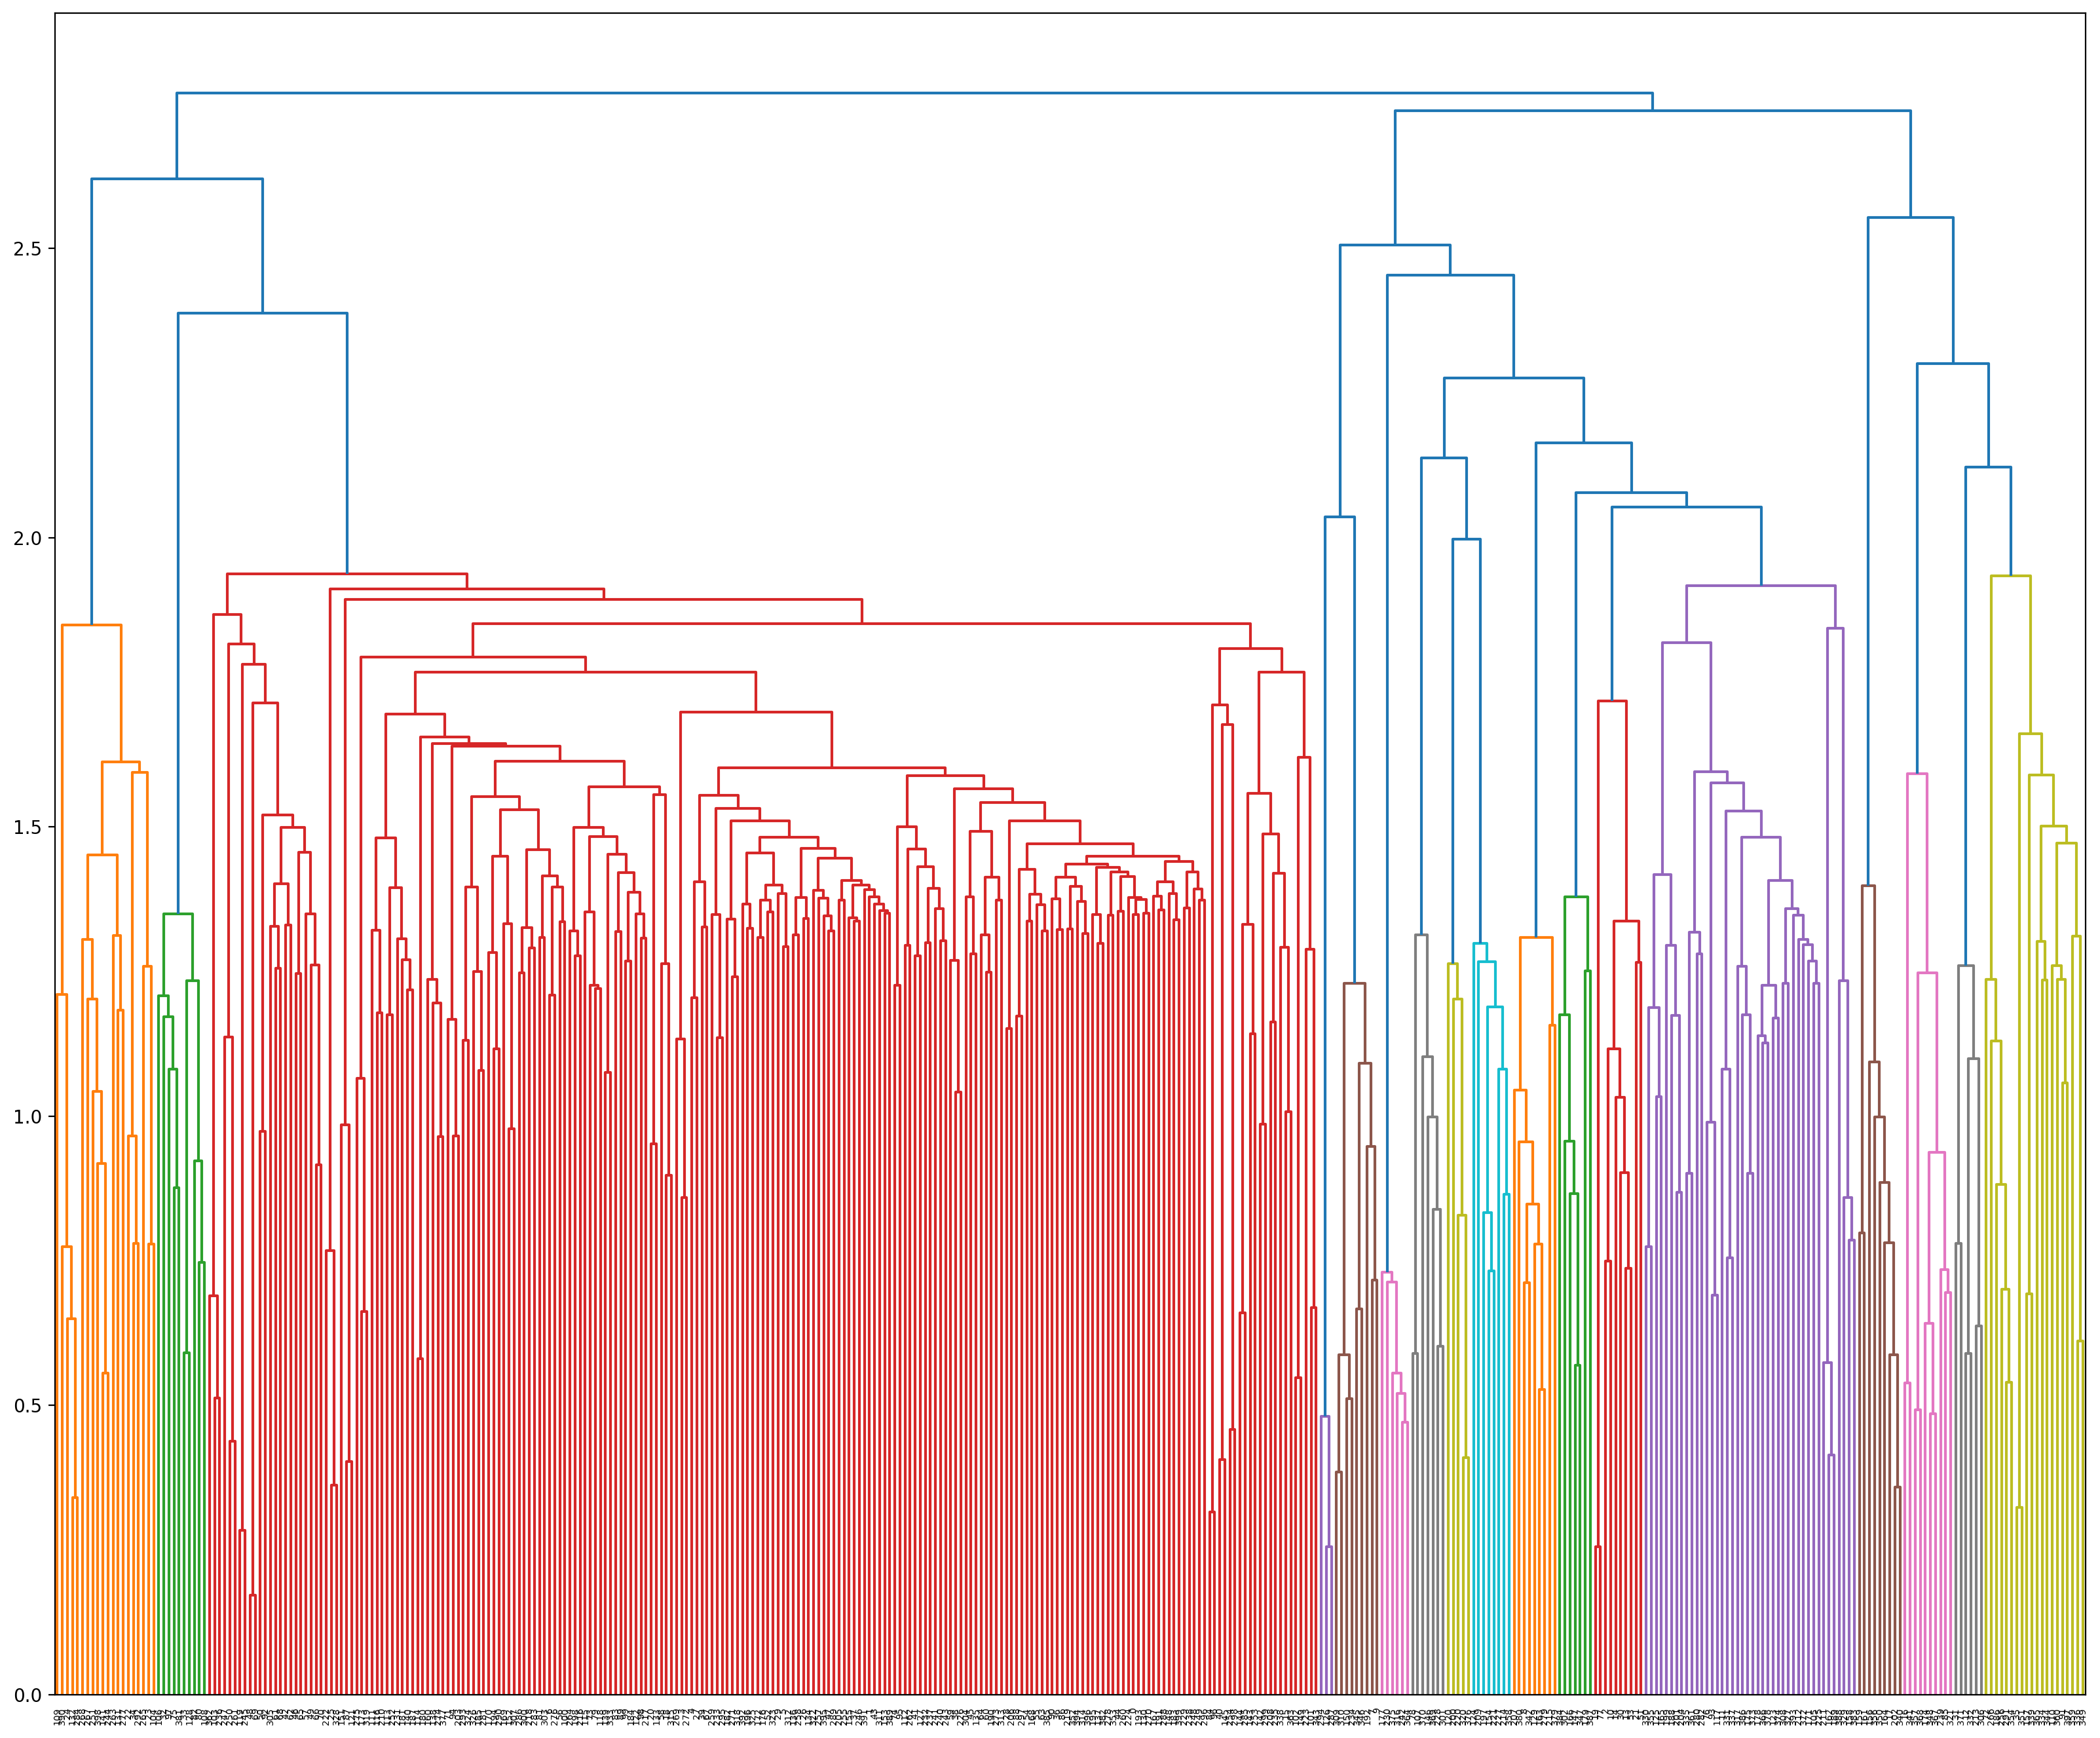

In [1192]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

Z = linkage(doc_topic.iloc[:, :-1].to_numpy(),'ward')

plt.figure(dpi=200, figsize=(20, 17))
R = dendrogram(Z,truncate_mode='mlab', show_leaf_counts=True);

In [1193]:
Z.shape

(399, 4)

# Agglomerative Clustering

In [1200]:
from sklearn.cluster import AgglomerativeClustering
cluster_assignments = AgglomerativeClustering(linkage='ward', n_clusters = 300).fit_predict(doc_topic.iloc[:, :-1].to_numpy())
clusters_assignments

array([153, 249,  16,  48, 250, 202, 247,  12,   4,  12,  16, 282,  69,
        14, 293, 294,  49,  27,  26,  68,   6, 216,   2,  19,  52,  20,
       159, 281, 267, 239,  14, 110, 262,  28,   2,  79, 174, 163, 291,
       170,  18, 209, 168, 273, 289, 207, 230, 178, 140, 219,   1, 180,
       146,  14, 162, 277, 165, 151, 218, 212, 227, 224, 229, 177, 182,
       171,   8, 152, 285, 140,   8, 264, 233, 242, 241,  29, 297,  68,
       184, 244,   3, 187,   3, 179,  17,   9, 283,  96, 261, 191, 259,
       288,   1,  39,   5,  75,  17, 284, 190, 213, 154,  33,  43,  91,
        19, 240, 248, 184,   3, 246, 220, 175, 200, 260,  40, 292, 256,
        39, 109,  61, 217,  96, 150, 263, 197, 145,  15, 169,  28,   4,
       295, 255,  52,   6, 173, 189, 183, 198, 252, 286, 245,  25, 298,
       268,  41,  18, 296,  24, 120,  43,  59, 299,   0, 148,  30, 158,
       280,  50,  45,  54, 232,  54,  51,   4,  27, 223,  24, 122, 149,
       166, 206, 214, 188,  56,   9,  13, 265,  55, 269, 225,  4

In [1221]:
doc_topic['clust_topic'] = cluster_assignments
doc_topic['clust_topic'].value_counts()

4      6
55     6
9      6
27     5
52     4
      ..
200    1
201    1
202    1
203    1
149    1
Name: clust_topic, Length: 300, dtype: int64

In [1230]:
topic_counts = doc_topic['clust_topic'].value_counts()
topic_counts.value_counts()

1    236
2     43
3     13
4      4
6      3
5      1
Name: clust_topic, dtype: int64

In [1234]:
topics = topic_counts[topic_counts.values > 1]
topics

4     6
55    6
9     6
27    5
52    4
     ..
5     2
34    2
1     2
13    2
39    2
Name: clust_topic, Length: 64, dtype: int64

In [1238]:
grouped_titles = []
for topic in topics.index:
    grouped_titles.append(doc_topic[doc_topic['clust_topic'] == topic].index.tolist())

In [1241]:
grouped_titles

[['Trump’s Harsh Talk With Malcolm Turnbull of Australia Strains Another Alliance - The New York Times',
  'Donald Trump’s undiplomatic diplomacy',
  'McCain rebukes Trump’s phone call with Australia, says he called ambassador to express US support',
  '’Big personality’: Australian PM puts brave face on phone call with Trump',
  'Tense call between Trump and Australian leader strains longtime ties',
  'Why the Trump phone call could be a very good thing for us Australians'],
 ['Kellyanne Conway and the Bowling Green Massacre That Wasn’t',
  'Chelsea Clinton’s dig at Kellyanne Conway sparks\xa0feud',
  'Conway cites nonexistent terror attack to justify Trump’s travel\xa0ban',
  'Bogus ’Bowling Green Massacre’ Claim Snarls Trump Adviser Conway',
  'Trump aide cites ’massacre’ that never occurred to defend immigrant ban',
  'Kellyanne Conway’s claim of a ‘Bowling Green massacre’'],
 ['WSJ: Trump Will Sign Executive Order to Roll Back Dodd-Frank - Breitbart',
  'Trump Begins to Chip Away 

## 2017-04-13 (n = 398) w/ Clustering

In [47]:
date = '2017-04-13'
n_publications = len(df[df.date==date].publication.value_counts())
print(f'Number of Publications Reported: {n_publications}')
df[df.date==date].publication.value_counts()

Number of Publications Reported: 12


New York Times      93
New York Post       64
Breitbart           52
NPR                 33
CNN                 29
Guardian            25
Atlantic            24
Washington Post     23
Reuters             17
National Review     14
Buzzfeed News       12
Business Insider    12
Name: publication, dtype: int64

In [48]:
text = df[df.date==date]['content_processed']
text.shape

(398,)

In [49]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(text)

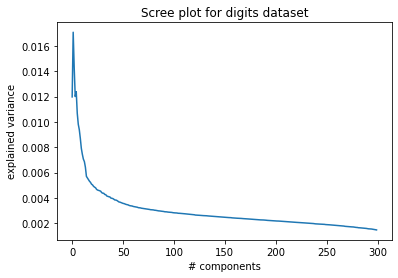

In [50]:
n_components = int(math.ceil((text.shape[0]*0.75) / 5.0) * 5.0)
lsa = TruncatedSVD(n_components)
doc_topic = lsa.fit_transform(tfidf)
plt.plot(lsa.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

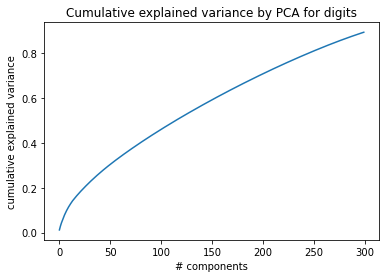

In [51]:
plt.plot(np.cumsum(lsa.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for digits');

In [52]:
index = []
for n in range(n_components):
    index.append('topic_{}'.format(n)) 
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = index,
             columns = vectorizer.get_feature_names())
topic_word

aarhus  aaroe  aaron     ab  abacha  abandon  abandoned  \
topic_0     0.000  0.000  0.003  0.000   0.000    0.003      0.004   
topic_1    -0.000 -0.000 -0.004 -0.000  -0.000    0.002      0.000   
topic_2    -0.000 -0.000 -0.001  0.000   0.000    0.001      0.000   
topic_3    -0.001 -0.001  0.001 -0.000  -0.000   -0.001     -0.005   
topic_4    -0.000 -0.000  0.002  0.000  -0.000   -0.004      0.000   
...           ...    ...    ...    ...     ...      ...        ...   
topic_295  -0.001 -0.001  0.003  0.000  -0.001   -0.008     -0.004   
topic_296   0.009  0.009  0.002  0.000   0.001    0.001     -0.004   
topic_297   0.003  0.003 -0.017  0.001  -0.000   -0.006      0.002   
topic_298   0.002  0.002  0.006 -0.001   0.000    0.003     -0.006   
topic_299   0.001  0.001  0.006 -0.000   0.001   -0.023      0.006   

           abandoning  abandonment  abbas  ...   zone    zoo  zubaida  \
topic_0         0.001        0.001  0.000  ...  0.004  0.003    0.002   
topic_1         0.000       -0.001 -0.000  ... -0.000 -0.002   -0.001   
topic_2         0.001       -0.002  0.000  ...  0.003  0.003    0.004   
topic_3        -0.000       -0.000 -0.001  ... -0.000 -0.000   -0.003   
topic_4         0.003       -0.001 -0.000  ...  0.002  0.005    0.002   
...               ...          ...    ...  ...    ...    ...      ...   
topic_295      -0.002        0.000  0.000  ...  0.008 -0.004   -0.002   
topic_296       0.010       -0.002  0.002  ...  0.007  0.021    0.005   
topic_297      -0.000       -0.002 -0.001  ... -0.005  0.002   -0.000   
topic_298       0.000        0.001 -0.002  ...  0.002  0.034   -0.001   
topic_299       0.006        0.003 -0.001  ... -0.003 -0.009   -0.003   

           zubaidas  zuckerberg  zuckerbergs  zukunft  zurbuchen  zurich  \
topic_0       0.001       0.002        0.001    0.003      0.001   0.003   
topic_1      -0.001      -0.002       -0.000    0.001     -0.001  -0.004   
topic_2       0.002       0.002        0.000   -0.002      0.002   0.008   
topic_3      -0.001      -0.004       -0.001   -0.003     -0.003  -0.001   
topic_4       0.001      -0.000        0.000    0.000      0.001   0.005   
...             ...         ...          ...      ...        ...     ...   
topic_295    -0.001       0.062        0.025    0.002      0.001  -0.008   
topic_296     0.002       0.004        0.003   -0.008     -0.003  -0.043   
topic_297    -0.000      -0.027       -0.010    0.016      0.000   0.011   
topic_298    -0.000      -0.012       -0.005    0.001     -0.002   0.030   
topic_299    -0.001      -0.029       -0.011   -0.003      0.001   0.010   

           zvyagintsev  
topic_0          0.000  
topic_1         -0.000  
topic_2          0.000  
topic_3         -0.001  
topic_4         -0.000  
...                ...  
topic_295        0.000  
topic_296        0.002  
topic_297       -0.001  
topic_298       -0.002  
topic_299       -0.001  

[300 rows x 17935 columns]

In [53]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
trump, mr, said, china, president, north, state, korea, would, russia

Topic  1
north, korea, china, korean, nuclear, trump, missile, weapon, chinese, bomb

Topic  2
airline, dao, passenger, flight, incident, united, north, chicago, video, plane

Topic  3
airline, mr, dao, flight, passenger, united, incident, russia, plane, chicago

Topic  4
afghanistan, bomb, attack, assad, syrian, russia, isi, syria, force, coalition

Topic  5
trump, president, airline, dao, flight, passenger, nato, obamacare, bannon, house

Topic  6
afghanistan, bomb, isi, mr, moab, military, force, afghan, dropped, republican

Topic  7
burger, google, king, ad, whopper, device, commercial, home, user, trigger

Topic  8
enceladus, moon, ocean, europa, cassini, nasa, hydrogen, saturn, life, earth

Topic  9
republican, democrat, north, burger, obamacare, parenthood, election, moon, enceladus, nuclear

Topic  10
china, coalition, taiwan, tesla, car, sdf, state, uber, vehicle, company

Topic  11
court, justice

mccartney, maggot, pandora, bcc, school, blanco, label, pilot, young, oakland

Topic  119
stone, card, maggot, catalog, dinosaur, library, pilot, alaska, persey, hankins

Topic  120
patent, ravel, uc, crispr, academy, caplan, panel, play, car, pompeo

Topic  121
urosa, animal, savino, myanmar, jackson, juda, protester, thompson, taxpayer, cotton

Topic  122
coachella, lesson, thorrington, pandora, queen, club, bruce, golf, special, life

Topic  123
hankins, giant, shhaideh, eel, million, nuclear, trafficking, muslim, meredith, bruce

Topic  124
furniture, ikea, dresser, eel, belichick, welch, richard, caplan, island, marlena

Topic  125
galaxy, bcc, halstead, ravel, mccartney, general, property, diamond, juda, gunman

Topic  126
calorie, murphy, jewish, goat, temple, benjamin, owner, dolan, harry, ledger

Topic  127
mccartney, benjamin, furniture, bannon, pickett, war, cat, maggot, pandora, wisconsin

Topic  128
mccartney, eel, panel, tran, temperature, shell, abortion, gao, magnetic, 

lichtman, enninful, merkel, impeachment, ravel, fashion, trafficking, automation, juda, apple

Topic  231
shhaideh, marathon, thorrington, trafficking, hitter, romania, francesa, visitor, need, wackrow

Topic  232
lichtman, sager, session, meredith, carr, impeachment, automation, dellal, university, farrington

Topic  233
benjamin, lichtman, vacca, sager, russian, perry, jesus, caplan, liquor, impeachment

Topic  234
sager, lichtman, recount, impeachment, fracking, medicaid, festival, microsoft, stein, epa

Topic  235
gay, missile, hedgecock, sidewalk, ledger, hong, abortion, fracking, dhs, gop

Topic  236
vaccine, walter, duterte, kindergarten, vaccination, davis, logo, chief, ashkenazi, benjamin

Topic  237
juda, gay, enninful, murphy, recount, greenville, catalog, strain, chechnya, card

Topic  238
walter, benjamin, davis, flynn, mask, vaccine, schwimmer, weapon, staten, automation

Topic  239
holleeder, gop, jackson, merkel, gang, sini, identity, eramo, seat, pruitt

Topic  240
lic

In [54]:
doc_topic = pd.DataFrame(doc_topic.round(5),
             index = df[df.date==date]['title'],
             columns = index)

doc_topic['topic'] = doc_topic.idxmax(axis=1).to_frame()
doc_topic['publication'] = df[df.date == date]['publication'].values
doc_topic['content'] = df[df.date == date]['content no nonascii'].values
doc_topic['content_processed'] = df[df.date == date]['content_processed'].values
doc_topic.head()

topic_0  topic_1  topic_2  \
title                                                                           
Edward Enninful Is Named Editor in Chief at Bri...  0.13779 -0.11005 -0.06019   
Trump’s Shift on Russia Brings Geopolitical Whi...  0.55727 -0.12351 -0.34849   
U.S. Takes Sharper Tone on Russia’s Role in Syr...  0.56134 -0.06592 -0.34870   
Trump Faces the Limits of American Power - The ...  0.32155  0.00253 -0.00534   
Trump Reversals Hint at Wall Street Wing’s Sway...  0.45890 -0.10120 -0.25781   

                                                    topic_3  topic_4  topic_5  \
title                                                                           
Edward Enninful Is Named Editor in Chief at Bri...  0.01393 -0.02836 -0.12874   
Trump’s Shift on Russia Brings Geopolitical Whi...  0.20869  0.12789 -0.09187   
U.S. Takes Sharper Tone on Russia’s Role in Syr...  0.26971  0.18817 -0.10865   
Trump Faces the Limits of American Power - The ...  0.04020  0.08499 -0.01336   
Trump Reversals Hint at Wall Street Wing’s Sway... -0.02811 -0.10009  0.12851   

                                                    topic_6  topic_7  topic_8  \
title                                                                           
Edward Enninful Is Named Editor in Chief at Bri...  0.02608 -0.00023  0.00838   
Trump’s Shift on Russia Brings Geopolitical Whi... -0.17886  0.03653  0.02631   
U.S. Takes Sharper Tone on Russia’s Role in Syr... -0.19579  0.05388  0.01951   
Trump Faces the Limits of American Power - The ... -0.00414 -0.01142 -0.01351   
Trump Reversals Hint at Wall Street Wing’s Sway...  0.06102  0.00653  0.01522   

                                                    topic_9  ...  topic_294  \
title                                                        ...              
Edward Enninful Is Named Editor in Chief at Bri... -0.05910  ...    0.00053   
Trump’s Shift on Russia Brings Geopolitical Whi... -0.01237  ...    0.02323   
U.S. Takes Sharper Tone on Russia’s Role in Syr... -0.04051  ...    0.02197   
Trump Faces the Limits of American Power - The ... -0.03512  ...    0.03176   
Trump Reversals Hint at Wall Street Wing’s Sway...  0.06447  ...   -0.04995   

                                                    topic_295  topic_296  \
title                                                                      
Edward Enninful Is Named Editor in Chief at Bri...   -0.01481    0.02751   
Trump’s Shift on Russia Brings Geopolitical Whi...   -0.01991    0.03727   
U.S. Takes Sharper Tone on Russia’s Role in Syr...   -0.00951    0.02181   
Trump Faces the Limits of American Power - The ...    0.00933   -0.04057   
Trump Reversals Hint at Wall Street Wing’s Sway...    0.01172   -0.01581   

                                                    topic_297  topic_298  \
title                                                                      
Edward Enninful Is Named Editor in Chief at Bri...   -0.01515   -0.01864   
Trump’s Shift on Russia Brings Geopolitical Whi...    0.00202    0.01564   
U.S. Takes Sharper Tone on Russia’s Role in Syr...   -0.00050   -0.02763   
Trump Faces the Limits of American Power - The ...   -0.01566    0.00018   
Trump Reversals Hint at Wall Street Wing’s Sway...   -0.01972    0.00558   

                                                    topic_299     topic  \
title                                                                     
Edward Enninful Is Named Editor in Chief at Bri...    0.00474  topic_71   
Trump’s Shift on Russia Brings Geopolitical Whi...    0.00858   topic_0   
U.S. Takes Sharper Tone on Russia’s Role in Syr...    0.01731   topic_0   
Trump Faces the Limits of American Power - The ...    0.00722   topic_0   
Trump Reversals Hint at Wall Street Wing’s Sway...    0.03356   topic_0   

                                                       publication  \
title                                                                
Edward Enninful Is Named Editor in Chief at Bri...  New York T

In [55]:
from sklearn.cluster import AgglomerativeClustering
X = doc_topic.select_dtypes('number').to_numpy()
cluster_assignments = AgglomerativeClustering(linkage='ward', n_clusters = n_components).fit_predict(X)


In [56]:
doc_topic['clust_topic'] = cluster_assignments
doc_topic['clust_topic'].value_counts()

7      6
0      5
59     5
34     5
47     5
      ..
200    1
201    1
202    1
203    1
149    1
Name: clust_topic, Length: 300, dtype: int64

In [57]:
topic_counts = doc_topic['clust_topic'].value_counts()
topic_counts.value_counts()

1    242
2     36
3     11
5      5
4      5
6      1
Name: clust_topic, dtype: int64

In [58]:
# get cluster with membership > 1
topics = topic_counts[topic_counts.values > 1]
topics.shape

(58,)

In [59]:
grouped_titles = []
for topic in topics.index:
    grouped_titles.append(doc_topic[doc_topic['clust_topic'] == topic].index.tolist())

In [60]:
grouped_titles

[['As World Awaits Nuclear Test, Japan Suggests North Korea May Have Sarin Gas Missiles - Breitbart',
  'North Korea may be able to arm missiles with sarin, Japan PM says ',
  'How North Korea pays for a nuclear program and lavish parties while under the tightest sanctions on earth',
  'Do the Syria Strikes Mean North Korea Is Next?',
  'China’s Xi urges peaceful resolution of North Korea tension in call with Trump',
  'Kim Jong Un’s rockets are getting an important boost — from China'],
 ['U.S. Military Drops Massive Bomb on Islamic State in Afghanistan - Breitbart',
  'Trump won’t say if he greenlit use of ’mother of all bombs’',
  'Why Did the U.S. Use the ’Mother of All Bombs’ in Afghanistan?',
  'US drops ‘Mother of all Bombs’ on ISIS target in\xa0Afghanistan',
  'U.S. Drops Biggest Non-Nuclear Bomb Ever Used In Combat'],
 ['NASA: Nearby ocean worlds could be best bet for life beyond Earth',
  'The Icy Plumes Shooting Out of Saturn’s Moon Just Got Way More Interesting',
  'Best be

### Visualizing with TSNE

In [61]:
matrix = doc_topic.select_dtypes('number').to_numpy()

In [62]:
tsne = TSNE(n_components=2)
graph_points = tsne.fit_transform(matrix)
graph_points.shape

(398, 2)

In [63]:
doc_topic2 = doc_topic.reset_index()
doc_topic2[doc_topic2['clust_topic'] == 7].index

idx = doc_topic2[doc_topic2['clust_topic'] == 7].index.tolist()
idx2 = doc_topic2[doc_topic2['clust_topic'] == 66].index.tolist()

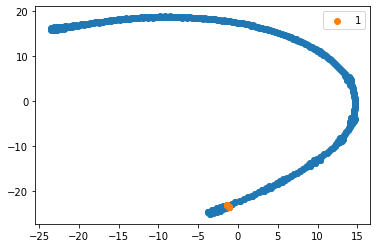

In [64]:
x_labeled = graph_points[:, 0][idx]
y_labeled = graph_points[:, 1][idx]

plt.scatter(graph_points[:, 0], graph_points[:, 1])
plt.scatter(x_labeled, y_labeled, label='1')
plt.legend()

In [66]:
idx = doc_topic2[doc_topic2['clust_topic'] == 7].index.tolist()
idx2 = doc_topic2[doc_topic2['clust_topic'] == 66].index.tolist()

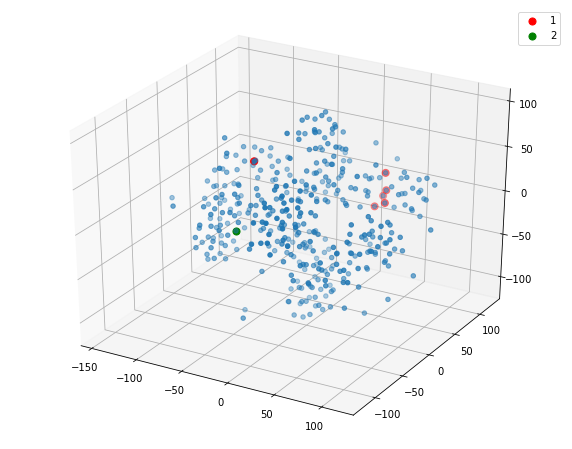

In [67]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

tsne = TSNE(n_components=3)
graph_points_test = tsne.fit_transform(matrix)

x = graph_points_test[:, 0]
y = graph_points_test[:, 1]
z = graph_points_test[:, 2]

x_labeled = graph_points_test[:, 0][idx]
y_labeled = graph_points_test[:, 1][idx]
z_labeled = graph_points_test[:, 2][idx]

x_labeled2 = graph_points_test[:, 0][idx2]
y_labeled2 = graph_points_test[:, 1][idx2]
z_labeled2 = graph_points_test[:, 2][idx2]

ax.scatter3D(x,y,z)
ax.scatter3D(x_labeled,y_labeled,z_labeled, s = 50, c='red', label='1')
ax.scatter3D(x_labeled2,y_labeled2,z_labeled2, s = 50, c='green', label='2')
plt.legend()

## 2017-07-03 (n=56) w clustering

In [917]:
date = '2017-07-03'
n_publications = len(df[df.date==date].publication.value_counts())
print(f'Number of Publications Reported: {n_publications}')
df[df.date==date].publication.value_counts()

Number of Publications Reported: 2


Reuters            35
Washington Post    21
Name: publication, dtype: int64

In [1438]:
text = df[df.date==date]['content_processed']
text.shape

(56,)

In [1439]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(text)

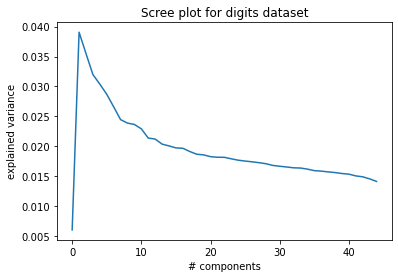

In [1440]:
n_components = int(math.ceil((text.shape[0]*0.75) / 5.0) * 5.0)
lsa = TruncatedSVD(n_components)
doc_topic = lsa.fit_transform(tfidf)
plt.plot(lsa.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

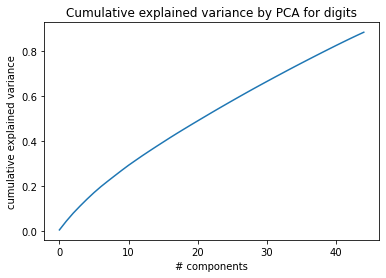

In [1441]:
plt.plot(np.cumsum(lsa.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for digits');

In [1442]:
index = []
for n in range(n_components):
    index.append('topic_{}'.format(n)) 
topic_word = pd.DataFrame(lsa.components_.round(3),
             index = index,
             columns = vectorizer.get_feature_names())
topic_word

abadi  abandoned    abc  abdelmadjid    abe   abes  ability  ablan  \
topic_0   0.002      0.005  0.004        0.002  0.053  0.028    0.001  0.002   
topic_1  -0.000      0.006 -0.008        0.002  0.033  0.016   -0.001  0.006   
topic_2   0.001     -0.000 -0.008        0.000  0.009  0.004   -0.000  0.000   
topic_3   0.002     -0.004 -0.001        0.003  0.237  0.125   -0.001 -0.002   
topic_4   0.003      0.001 -0.005        0.002  0.209  0.111    0.000 -0.001   
topic_5  -0.002     -0.007  0.003       -0.001  0.030  0.015   -0.001 -0.001   
topic_6   0.003      0.004 -0.004        0.005 -0.046 -0.025    0.004 -0.002   
topic_7   0.007     -0.009 -0.008        0.007 -0.150 -0.081    0.001 -0.002   
topic_8   0.005      0.014  0.002        0.003 -0.076 -0.042   -0.002  0.004   
topic_9   0.007     -0.006 -0.001        0.009 -0.076 -0.043    0.000 -0.002   
topic_10 -0.007      0.006 -0.009       -0.006  0.003  0.003    0.002  0.002   
topic_11 -0.000     -0.013  0.000       -0.002 -0.004 -0.001   -0.001 -0.000   
topic_12 -0.004     -0.005 -0.003       -0.006  0.003  0.002    0.007 -0.007   
topic_13  0.003      0.017  0.003       -0.001 -0.020 -0.010   -0.000  0.005   
topic_14  0.005      0.005  0.002       -0.003 -0.005 -0.004   -0.005 -0.014   
topic_15  0.007     -0.005  0.002        0.002  0.065  0.035   -0.001 -0.003   
topic_16 -0.011     -0.001 -0.001        0.015  0.013  0.007   -0.003 -0.012   
topic_17 -0.003     -0.003 -0.001       -0.018 -0.019 -0.010   -0.002 -0.003   
topic_18  0.005     -0.005 -0.002       -0.012  0.013  0.008    0.005 -0.010   
topic_19 -0.008      0.003 -0.000       -0.011  0.017  0.007   -0.002  0.020   
topic_20 -0.005     -0.001 -0.002       -0.004  0.002  0.002   -0.003  0.001   
topic_21  0.014     -0.008  0.002       -0.007 -0.005 -0.002    0.004  0.023   
topic_22  0.002     -0.010 -0.000       -0.013 -0.006 -0.002    0.003 -0.007   
topic_23 -0.010     -0.002 -0.002       -0.014  0.014  0.008   -0.002  0.004   
topic_24 -0.004     -0.009 -0.002        0.011 -0.041 -0.020   -0.005  0.012   
topic_25  0.006     -0.004  0.000       -0.016 -0.039 -0.022   -0.001 -0.012   
topic_26  0.013     -0.005  0.001       -0.010  0.008  0.006   -0.005  0.002   
topic_27  0.003     -0.006 -0.002       -0.007 -0.019 -0.011   -0.003 -0.004   
topic_28 -0.000     -0.003 -0.001        0.001 -0.006 -0.003    0.005  0.006   
topic_29  0.019      0.010 -0.004       -0.003  0.016  0.009   -0.006 -0.000   
topic_30  0.002     -0.009 -0.006        0.007  0.015  0.007    0.005  0.001   
topic_31  0.003     -0.002 -0.001       -0.000  0.006  0.004   -0.003  0.020   
topic_32  0.005      0.006 -0.002       -0.009 -0.001  0.000   -0.007 -0.003   
topic_33 -0.013     -0.009  0.001        0.002 -0.007 -0.004   -0.007 -0.003   
topic_34  0.009     -0.013 -0.000        0.006  0.017  0.009   -0.002 -0.005   
topic_35 -0.009     -0.005 -0.002       -0.001  0.008  0.002   -0.002  0.000   
topic_36  0.001     -0.014 -0.002        0.002 -0.004 -0.000   -0.001  0.000   
topic_37 -0.004      0.008  0.001       -0.015  0.005  0.001    0.003  0.000   
topic_38  0.001     -0.010  0.003       -0.007  0.000 -0.002   -0.001  0.000   
topic_39  0.007      0.000  0.002        0.000 -0.010 -0.007   -0.004 -0.002   
topic_40  0.003     -0.020  0.005       -0.001  0.009  0.005    0.002  0.002   
topic_41 -0.002     -0.013 -0.001       -0.000  0.013  0.009   -0.002  0.005   
topic_42  0.001      0.010  0.006       -0.005 -0.004 -0.001    0.002 -0.004   
topic_43 -0.001      0.014 -0.010        0.000  0.010  0.006   -0.002 -0.003   
topic_44  0.003      0.011  0.000        0.005  0.003  0.000    0.002 -0.008   

           able  abraham  ...  yuichiro    yup  yuriko  zagaris  zakaria  \
topic_0   0.012    0.001  ...     0.003  0.002   0.006    0.001    0.003   
topic_1  -0.007   -0.001  ...     0.007 -0.001   0.004   -0.000   -0.001   
topic_2   0.012   -0.000  ...    -0.000 -0.000   0.001   -0.000   -0.000   
topic_3   0.009   -0.000 

In [1443]:
display_topics(lsa, vectorizer.get_feature_names(), 10)


Topic  0
trump, said, percent, state, would, president, new, year, election, company

Topic  1
percent, bank, rose, sale, index, crude, highest, company, construction, billion

Topic  2
christie, beach, park, governor, state, budget, shutdown, family, jersey, island

Topic  3
abe, ldp, tokyo, party, election, abes, minister, putin, seat, koikes

Topic  4
fox, horowitz, sport, abe, ldp, party, tokyo, abes, minister, allegation

Topic  5
fox, horowitz, sport, percent, crude, rose, bank, trump, output, construction

Topic  6
jefferson, wimbledon, kang, life, franklin, goddard, american, agassi, djokovic, break

Topic  7
putin, russia, russian, rule, state, meeting, syria, airport, ukraine, interference

Topic  8
danone, putin, fairfax, stonyfield, deal, glp, equity, domain, bid, westinghouse

Topic  9
bill, budget, airport, vote, senate, city, rule, airline, gop, mexico

Topic  10
bill, budget, putin, would, gop, jefferson, senate, medicaid, tax, russia

Topic  11
wimbledon, kang, agassi

In [1444]:
doc_topic = pd.DataFrame(doc_topic.round(5),
             index = df[df.date==date]['title'],
             columns = index)

doc_topic['topic'] = doc_topic.idxmax(axis=1).to_frame()
doc_topic['publication'] = df[df.date == date]['publication'].values
doc_topic['content'] = df[df.date == date]['content no nonascii'].values
doc_topic['content_processed'] = df[df.date == date]['content_processed'].values
doc_topic.head()

topic_0  topic_1  topic_2  \
title                                                                           
Commentary: Seeking the truth, not the tragedy,...  0.31315 -0.09596 -0.11316   
Maine, New Jersey lawmakers scramble to end par...  0.36550 -0.18146  0.61666   
Japan PM’s party suffers historic defeat in Tok...  0.29871  0.06570  0.01343   
Japan PM seeks to regain public’s trust after T...  0.33978  0.12117  0.03140   
Australia’s Fairfax ends talks with PE suitors ...  0.25092  0.28092  0.00099   

                                                    topic_3  topic_4  topic_5  \
title                                                                           
Commentary: Seeking the truth, not the tragedy,... -0.04850  0.00565  0.04508   
Maine, New Jersey lawmakers scramble to end par... -0.03514 -0.07183  0.01009   
Japan PM’s party suffers historic defeat in Tok...  0.56900  0.49121  0.05566   
Japan PM seeks to regain public’s trust after T...  0.58084  0.47943  0.07030   
Australia’s Fairfax ends talks with PE suitors ... -0.12477  0.00705 -0.16755   

                                                    topic_6  topic_7  topic_8  \
title                                                                           
Commentary: Seeking the truth, not the tragedy,...  0.14931 -0.12000  0.06234   
Maine, New Jersey lawmakers scramble to end par... -0.17486 -0.00996 -0.00751   
Japan PM’s party suffers historic defeat in Tok... -0.10128 -0.29235 -0.16431   
Japan PM seeks to regain public’s trust after T... -0.08882 -0.26915 -0.11896   
Australia’s Fairfax ends talks with PE suitors ... -0.08023 -0.22534  0.39176   

                                                    topic_9  ...  topic_39  \
title                                                        ...             
Commentary: Seeking the truth, not the tragedy,... -0.01667  ...  -0.04511   
Maine, New Jersey lawmakers scramble to end par...  0.11277  ...  -0.04460   
Japan PM’s party suffers historic defeat in Tok... -0.17242  ...  -0.02171   
Japan PM seeks to regain public’s trust after T... -0.11100  ...  -0.00556   
Australia’s Fairfax ends talks with PE suitors ... -0.07898  ...   0.02278   

                                                    topic_40  topic_41  \
title                                                                    
Commentary: Seeking the truth, not the tragedy,...   0.17800   0.00946   
Maine, New Jersey lawmakers scramble to end par...  -0.04608   0.05853   
Japan PM’s party suffers historic defeat in Tok...   0.01440   0.02786   
Japan PM seeks to regain public’s trust after T...   0.00705   0.00729   
Australia’s Fairfax ends talks with PE suitors ...  -0.29172  -0.16250   

                                                    topic_42  topic_43  \
title                                                                    
Commentary: Seeking the truth, not the tragedy,...  -0.10570  -0.10422   
Maine, New Jersey lawmakers scramble to end par...  -0.05453   0.06375   
Japan PM’s party suffers historic defeat in Tok...   0.00274   0.01878   
Japan PM seeks to regain public’s trust after T...  -0.00990   0.00522   
Australia’s Fairfax ends talks with PE suitors ...   0.23029   0.25054   

                                                    topic_44    topic  \
title                                                                   
Commentary: Seeking the truth, not the tragedy,...   0.08266  topic_0   
Maine, New Jersey lawmakers scramble to end par...  -0.00168  topic_2   
Japan PM’s party suffers historic defeat in Tok...  -0.00909  topic_3   
Japan PM seeks to regain public’s trust after T...   0.01176  topic_3   
Australia’s Fairfax ends talks with PE suitors ...   0.20238  topic_8   

                                                    publication  \
title                                                             
Commentary: Seeking the truth, not the tragedy,...      Reuters   
Maine, New Jersey lawmakers scramble to end par...

In [1445]:
from sklearn.cluster import AgglomerativeClustering
X = doc_topic.select_dtypes('number').to_numpy()
cluster_assignments = AgglomerativeClustering(linkage='ward', n_clusters = n_components).fit_predict(X)

In [1447]:
doc_topic['clust_topic'] = cluster_assignments
doc_topic['clust_topic'].value_counts()

0     4
1     3
4     2
7     2
5     2
10    2
3     2
2     2
6     1
8     1
9     1
21    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
44    1
43    1
23    1
42    1
41    1
40    1
39    1
38    1
37    1
36    1
35    1
34    1
33    1
32    1
31    1
30    1
29    1
28    1
27    1
26    1
25    1
24    1
22    1
Name: clust_topic, dtype: int64

In [1450]:
topic_counts = doc_topic['clust_topic'].value_counts()
topic_counts.value_counts()

1    37
2     6
4     1
3     1
Name: clust_topic, dtype: int64

In [1451]:
topics = topic_counts[topic_counts.values > 1]
topics.shape

(8,)

In [1452]:
grouped_titles = []
for topic in topics.index:
    grouped_titles.append(doc_topic[doc_topic['clust_topic'] == topic].index.tolist())

In [1453]:
grouped_titles

[['The economy President Trump loves looks a lot like the one candidate Trump hated',
  'The problem with ‘But Trump’s base loves it!’',
  'Why Trump wants a war on the media',
  'If this scam works as planned, Republicans could still destroy Obamacare'],
 ['Global stocks, dollar, oil, treasury yields start quarter with gains',
  'Oil rises more than 2 percent as U.S. crude output slows',
  'U.S. factory activity jumps to near three-year high, construction spending flat'],
 ['Japan PM’s party suffers historic defeat in Tokyo poll, popular governor wins big',
  'Japan PM seeks to regain public’s trust after Tokyo poll setback'],
 ['Fox Sports dismisses president of national networks',
  'Jamie Horowitz fired as head of Fox Sports amid reports of sexual harassment'],
 ['Maine, New Jersey lawmakers scramble to end partial government shutdowns',
  'Illinois Senate mulls fate of budget that would end stalemate'],
 ['Chris Christie enjoyed a closed beach, then got flamed. But he definitely d

# Prototyping Recommender

In [1155]:
date = '2017-02-03'

def load_text(date):
    text = df[df.date==date]['content_processed']
    return text
    
def vectorize(text):
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform(text)
    return tfidf, vectorizer

def get_doc_topic(tfidf):
    n_components = int(math.ceil((tfidf.shape[0]*0.75) / 5.0) * 5.0)
    lsa = TruncatedSVD(n_components)
    doc_topic = lsa.fit_transform(tfidf)
    
    index = []
    for n in range(n_components):
        index.append('topic_{}'.format(n))
        
    doc_topic = pd.DataFrame(doc_topic.round(5),
             index = df[df.date==date]['title'],
             columns = index)

    #doc_topic['topic'] = doc_topic.idxmax(axis=1).to_frame()
    doc_topic['publication'] = df[df.date == date]['publication'].values
    doc_topic['content'] = df[df.date == date]['content'].values
    doc_topic['content_processed'] = df[df.date == date]['content_processed'].values
    
    return doc_topic, lsa

In [1149]:
def get_clusters(doc_topic):
    n_components=300
    X = doc_topic.select_dtypes('number').to_numpy()
    cluster_assignments = AgglomerativeClustering(linkage='ward', n_clusters = n_components).fit_predict(X)
    
    doc_topic['clust_topic'] = cluster_assignments
    return doc_topic

def retrieve_groups(doc_topic):
    topic_counts = doc_topic['clust_topic'].value_counts()
    topics = topic_counts[topic_counts.values > 1]
    
    grouped_titles = []
    for topic in topics.index:
        grouped_titles.append(doc_topic[doc_topic['clust_topic'] == topic].index.tolist())
    
    return grouped_titles

In [1157]:
tfidf, vetorizer = vectorize(load_text(date))
doc, lsa = get_doc_topic(tfidf)
doc = get_clusters(doc)

In [317]:
df1 = df[['title', 'publication', 'date', 'content', 'content_processed']]
df1

title      publication  \
0       House Republicans Fret About Winning Their Hea...   New York Times   
1       Rift Between Officers and Residents as Killing...   New York Times   
2       Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...   New York Times   
3       Among Deaths in 2016, a Heavy Toll in Pop Musi...   New York Times   
4       Kim Jong-un Says North Korea Is Preparing to T...   New York Times   
...                                                   ...              ...   
146028  An eavesdropping Uber driver saved his 16-year...  Washington Post   
146029  Plane carrying six people returning from a Cav...  Washington Post   
146030  After helping a fraction of homeowners expecte...  Washington Post   
146031  Yes, this is real: Michigan just banned bannin...  Washington Post   
146032  What happened in Washington state after voters...  Washington Post   

              date                                            content  \
0       2016-12-31  WASHINGTON     Congressional Republicans have ...   
1       2017-06-19  After the bullet shells get counted, the blood...   
2       2017-01-06  When Walt Disneys Bambi opened in 1942, critic...   
3       2017-04-10  Death may be the great equalizer, but it isnt ...   
4       2017-01-02  SEOUL, South Korea     North Koreas leader, Ki...   
...            ...                                                ...   
146028  2016-12-30           Uber driver Keith Avila picked up a p...   
146029  2016-12-30           Crews on Friday continued to search L...   
146030  2016-12-30       When the Obama administration announced a...   
146031  2016-12-30       This story has been updated. A new law in...   
146032  2016-12-29       The nations first recreational marijuana ...   

                                        content_processed  
0       washington congressional republican new fear c...  
1       bullet shell get counted blood dry votive cand...  
2       walt disney bambi opened critic praised spare ...  
3       death may great equalizer isnt necessarily eve...  
4       seoul south korea north korea leader kim said ...  
...                                                   ...  
146028  uber driver keith avila picked passenger looke...  
146029  crew friday continued search lake erie plane c...  
146030  obama administration announced massive effort ...  
146031  story updated new law michigan prohibit local ...  
146032  nation first recreational marijuana shop opene...  

[129620 rows x 5 columns]

In [918]:
class Recommender:
    
    def __init__(self, data, date, new_content):
        self.date = date
        self.new_content = new_content
        self.df = data[data.date == date].reset_index().drop('index', axis =1)
        
        self.topic_word = None
        self.doc_topic = None
        self.doc_topic_mat = None
        self.grouped_articles = None  
        self.article_group = None
        self.current_score = None
        
    def process_text(self):
        txt_processed = lemmatize(remove_stop_words(text_preprocess(self.new_content)))
        return txt_processed
    
    def add_new_content(self):
        if self.new_content not in self.df.content.tolist():
            content_processed = self.process_text()
            new_article = {'title': 'Your Article', 'publication': None, 'date': self.date, 
                           'content': self.new_content, 'content_processed': content_processed}
            self.df = self.df.append(new_article, ignore_index=True)
        else:
            row_idx = self.df[self.df.content == self.new_content].index
            self.df.loc[row_idx, 'title'] = 'Your Article'
            #self.df[self.df.content == self.new_content]['title'] = 'Your Article'
    
    def vectorize(self):
        self.add_new_content()
        text = self.df['content_processed']
        vectorizer = TfidfVectorizer()
        tfidf = vectorizer.fit_transform(text)
        return tfidf
    
#     def get_topic_word():
#         index = []
#         for n in range(n_components):
#             index.append('topic_{}'.format(n)) 
#         topic_word = pd.DataFrame(lsa.components_.round(3),
#                      index = index,
#                      columns = vectorizer.get_feature_names())
#         topic_word

    def get_doc_topic(self):
        tfidf = self.vectorize()
        n_components = int(math.ceil((tfidf.shape[0]*0.75) / 5.0) * 5.0)
        lsa = TruncatedSVD(n_components, random_state=0)
        doc_topic_mat = lsa.fit_transform(tfidf)

        index = []
        for n in range(n_components):
            index.append('topic_{}'.format(n))

        self.doc_topic_mat = pd.DataFrame(doc_topic_mat.round(5), columns = index)
        self.doc_topic = self.df.join(self.doc_topic_mat)
        
        #doc_topic['topic'] = doc_topic.idxmax(axis=1).to_frame()
        #self.doc_topic['publication'] = self.df[self.df.date == self.date]['publication'].values
#         self.doc_topic['content'] = self.df['content'].values
#         self.doc_topic['content_processed'] = self.df['content_processed'].values
        

        #return self.doc_topic
    
    def get_clusters(self):
        self.get_doc_topic()
        n_components = int(math.ceil((self.df.shape[0]*0.75) / 5.0) * 5.0)
        X = self.doc_topic.select_dtypes('number').to_numpy()
        model = AgglomerativeClustering(linkage='ward', n_clusters = n_components)
        cluster_assignments = model.fit_predict(X)
        
        self.doc_topic['clust_topic'] = cluster_assignments
        
        #return self.doc_topic.reset_index()[['title', 'content', 'clust_topic']]
    
#     def retrieve_groups(self):
#         '''
#         Returns the indices of grouped articles
#         '''
#         self.get_clusters()
#         topic_counts = self.doc_topic['clust_topic'].value_counts()
#         topics = topic_counts[topic_counts.values > 1]

#         grouped_titles = []
#         for topic in topics.index:
#             grouped_titles.append(self.doc_topic[self.doc_topic['clust_topic'] == topic].index.tolist())

#         self.grouped_articles = grouped_titles
    
    def retrieve_article_group(self):
        self.get_clusters()
        topic_counts = self.doc_topic['clust_topic'].value_counts()
        topics = topic_counts[topic_counts.values > 1]

        grouped_titles = []
        for topic in topics.index:
            grouped_titles.append(self.doc_topic[self.doc_topic['clust_topic'] == topic].title.tolist())

        self.grouped_articles = grouped_titles
        
        group_num = self.doc_topic[self.doc_topic.title == 'Your Article'].clust_topic.values[0]
        article_group = self.doc_topic[self.doc_topic.clust_topic == group_num][['title', 'publication', 'content']]
        self.article_group = article_group.reset_index().drop('index', axis = 1)
        
    def get_sentiment(self):
        self.retrieve_article_group()
        ssr = self.article_group['content'].apply(get_intro_conclusion_sentiment).round(3)
        self.article_group['sentiment score (raw)'] = ssr
        self.article_group['sentiment score (scaled)'] = np.interp(ssr, (ssr.min(), ssr.max()), (-1, +1)).round(3)
        self.article_group = self.article_group.sort_values(by='sentiment score (raw)', ascending=False, ignore_index=True)

    def find_diff(row):
        base = self.article_group[self.article_group.title == 'Your Article']['sentiment score (scaled)'].values[0]
        return row - base    
    
    def recommender(self):
        self.get_sentiment()
        if len(self.article_group) == 1:
            print('Unable to find articles of the same story. This article is unique!')
            return
        if len(self.article_group) == 2:
            print(self.article_group[self.article_group.title != 'Your Article'].title.to_list()[0])
        else:
            self.current_score = self.article_group[self.article_group.title == 'Your Article']['sentiment score (scaled)'].values[0]
            diffs = [self.current_score - score for score in self.article_group['sentiment score (scaled)'].values]
            self.article_group['difference'] = diffs
            current_idx = np.where(self.article_group.difference == 0 )[0][0]
            
#             diffs = self.article_group['sentiment score (scaled)'].apply(find_diff).values
#             self.article_group['difference'] = diffs
#             current_idx = np.where(self.article_group.difference == 0 )[0][0]
            if len(diffs)/current_idx == 2:
                print(self.article_group.iloc[0].title)
                print(self.article_group.iloc[-1].title)
            else:
                opp_score = list(reversed(diffs))[current_idx]
                print(self.article_group.iloc[np.where(diffs == opp_score)[0][0]].title)

In [919]:
txt = '''Just days before his inauguration, President-elect Donald J. Trump stood beside his tax lawyer at a Midtown Manhattan news conference as she announced that he planned to place his vast business holdings in a trust, a move she said would allay fears that he might exploit the Oval Office for personal gain.

However, a number of questions were left unanswered — including who would ultimately benefit from the trust — raising concerns about just how meaningful the move was.

Now, records have emerged that show just how closely tied Mr. Trump remains to the empire he built.

While the president says he has walked away from the day-to-day operations of his business, two people close to him are the named trustees and have broad legal authority over his assets: his eldest son, Donald Jr., and Allen H. Weisselberg, the Trump Organization’s chief financial officer. Mr. Trump, who will receive reports on any profit, or loss, on his company as a whole, can revoke their authority at any time.

What’s more, the purpose of the Donald J. Trump Revocable Trust is to hold assets for the “exclusive benefit” of the president. This trust remains under Mr. Trump’s Social Security number, at least as far as federal taxes are concerned.

Since his election, there have been widespread calls for Mr. Trump to sell his assets and put the proceeds in a blind trust. He has resisted those calls, stressing that the president has no legal obligation to do so. While the trust structure, outlined in documents made public through a Freedom of Information Act request by ProPublica, may give the president the appearance of distance from his business, it drew sharp criticism from experts in government ethics.

“I don’t see how this in the slightest bit avoids a conflict of interest,” said Frederick J. Tansill, a trust and estates lawyer from Virginia who examined the documents at the request of The New York Times. “First it is revocable at any time, and it is his son and his chief financial officer who are running it.”

It is not uncommon for people to place assets in a trust with themselves as beneficiaries for estate-planning purposes. But Mr. Trump’s situation is unprecedented because it involves a wealthy president acting to avoid an appearance of conflict of interest.

The Trump Organization declined to comment for this article.

The most immediate test of Mr. Trump’s legal moves to separate himself from his company, the Trump Organization, pertains to the ownership of the new Trump International Hotel in the Old Post Office Building in Washington.

The trust documents, which were prepared last month, argue that “all beneficial ownership in the licensee previously held by Donald J. Trump, personally, now is held derivatively and beneficially by The Donald J. Trump Revocable Trust,” which is legal language intended to suggest that Mr. Trump no longer has a personal tie to the hotel lease.

A provision in the 2013 lease for the building, held by Mr. Trump and his three oldest children, appears to prohibit a federally elected official, including the president, from benefiting from it.

But lawyers who specialize in federal contracts say the trust arrangement simply creates an additional legal step between Mr. Trump and the hotel — meaning he will still profit from it.

Robert H. Sitkoff, a professor at Harvard Law School, said the new details in the trust documents were unlikely to resolve the apparent legal problems with the Old Post Office site.

“Formally he is no longer the owner, but functionally he still is,” he said.

Representative Elijah E. Cummings, Democrat of Maryland, the ranking member on the House Committee on Oversight and Government Reform who has called for a congressional investigation into the lease, said he remained unsatisfied that Mr. Trump had addressed his conflicts. “This is smoke and mirrors,” he said of the new documents.

While Mr. Trump may have to take additional legal steps to avoid violating the terms of the Old Post Office lease, he is exempt from laws that prohibit federal employees from participating in government matters that will directly affect their own financial interests. 

At the Jan. 11 news conference in which she outlined the plans for Mr. Trump’s assets, Sheri A. Dillon, his tax lawyer, called the steps he had already taken significant, adding there was an agreement governing the president’s trust that “sharply” limited the amount of information about his company that he could access.

“The president-elect will have no role in deciding whether the Trump Organization engages in any new deal,” she said, “and he will only know of a deal if he reads it in the paper or sees it on TV.”

Ms. Dillon added that an asset sale by Mr. Trump would also be fraught with issues. “Whatever price was paid would be subject to criticism and scrutiny,” she said. “Was it too high? Is there pay for play? Was it too much pay to curry favor with the president-elect?”

The Trump Organization, which is privately held, has also released a list of 488 Trump companies that Mr. Trump has held positions at, saying he resigned from all of them. Public records show that he has severed ties from some of these entities.

The Trump Organization has pledged not to pursue new business deals overseas, though it plans to expand within the United States. Last month the company named Bobby Burchfield, a longtime Republican Party lawyer and corporate litigator, as an “independent ethics adviser.”

The Donald J. Trump Revocable Trust has existed since at least 2014, records show. By 2016 it was the only shareholder in DJT Holdings, one of Mr. Trump’s main limited liability companies, according to documents filed by Mr. Trump as part of his bid for president and released by the Federal Election Commission. That company holds some of Mr. Trump’s largest assets, including his Old Post Office lease, golf courses and residential properties including a house in Beverly Hills, Calif.

New York City property records show that in recent weeks Mr. Trump has transferred several residential condominiums he owns into the trust.'''

In [926]:
obj = Recommender(df1, '2017-02-03', txt)

In [927]:
obj.recommender()

Tense call between Trump and Australian leader strains longtime ties


<ipython-input-918-9b0d32e25c7f>:134: RuntimeWarning: divide by zero encountered in long_scalars
  if len(diffs)/current_idx == 2:


In [922]:
obj.grouped_articles

[['Trump’s Harsh Talk With Malcolm Turnbull of Australia Strains Another Alliance - The New York Times',
  'Donald Trump’s undiplomatic diplomacy',
  'McCain rebukes Trump’s phone call with Australia, says he called ambassador to express US support',
  '’Big personality’: Australian PM puts brave face on phone call with Trump',
  'Tense call between Trump and Australian leader strains longtime ties',
  'Why the Trump phone call could be a very good thing for us Australians'],
 ['Kellyanne Conway and the Bowling Green Massacre That Wasn’t',
  'Chelsea Clinton’s dig at Kellyanne Conway sparks\xa0feud',
  'Conway cites nonexistent terror attack to justify Trump’s travel\xa0ban',
  'Bogus ’Bowling Green Massacre’ Claim Snarls Trump Adviser Conway',
  'Trump aide cites ’massacre’ that never occurred to defend immigrant ban',
  'Kellyanne Conway’s claim of a ‘Bowling Green massacre’'],
 ['WSJ: Trump Will Sign Executive Order to Roll Back Dodd-Frank - Breitbart',
  'Trump Begins to Chip Away 

In [867]:
diffs = obj.article_group['sentiment score (scaled)'].apply(find_diff).values
current_idx = np.where(diffs == 0 )[0][0]
if len(diffs)/current_idx == 2:
    print(obj.article_group.iloc[0].title)
    print(obj.article_group.iloc[-1].title)
else:
    opp_score = list(reversed(diffs))[current_idx]
    print(obj.article_group.iloc[np.where(diffs == opp_score)[0][0]].title)

Your Article


In [868]:
obj.article_group

title       publication  \
0                                       Your Article    New York Times   
1  McCain rebukes Trump’s phone call with Austral...  Business Insider   
2  ’Big personality’: Australian PM puts brave fa...          Guardian   
3              Donald Trump’s undiplomatic diplomacy               CNN   
4  Tense call between Trump and Australian leader...           Reuters   

                                             content  sentiment score (raw)  \
0  BEIJING     President Trumps combative phone c...                  0.931   
1        Sen. John McCain of Arizona released a s...                  0.565   
2  The Australian prime minister, Malcolm Turnbul...                  0.483   
3  Washington (CNN) President Donald Trump is qui...                 -0.386   
4   U. S. ties with staunch ally Australia became...                 -0.781   

   sentiment score (scaled)  difference  
0                     1.000       2.000  
1                     0.572       1.572  
2                     0.477       1.477  
3                    -0.539       0.461  
4                    -1.000       0.000

In [858]:
obj.article_group['difference'] = obj.article_group['sentiment score (scaled)'].apply(find_diff)
obj.article_group

title       publication  \
0                                       Your Article    New York Times   
1  McCain rebukes Trump’s phone call with Austral...  Business Insider   
2  ’Big personality’: Australian PM puts brave fa...          Guardian   
3              Donald Trump’s undiplomatic diplomacy               CNN   
4  Tense call between Trump and Australian leader...           Reuters   

                                             content  sentiment score (raw)  \
0  BEIJING     President Trumps combative phone c...                  0.931   
1        Sen. John McCain of Arizona released a s...                  0.565   
2  The Australian prime minister, Malcolm Turnbul...                  0.483   
3  Washington (CNN) President Donald Trump is qui...                 -0.386   
4   U. S. ties with staunch ally Australia became...                 -0.781   

   sentiment score (scaled)  difference  
0                     1.000       2.000  
1                     0.572       1.572  
2                     0.477       1.477  
3                    -0.539       0.461  
4                    -1.000       0.000

In [832]:
def find_diff(row):
    base = article_group[article_group.title == 'Your Article']['sentiment score (scaled)'].values[0]
    return row - base

In [567]:
if len(article_group) == 1:
    print('Unable to find articles of the same story. This article is unique.')
else:
    diffs = article_group['sentiment score (scaled)'].apply(find_diff).values
    current_idx = np.where(diffs == 0 )[0][0]
    if len(diffs)/current_idx == 2:
        print(article_group.iloc[0].title)
        print(article_group.iloc[-1].title)
    else:
        opp_score = list(reversed(diffs))[current_idx]
        print(article_group.iloc[np.where(diffs == opp_score)[0][0]].title)
    

What Snap’s I.P.O. Filing Reveals About the Company - The New York Times


# TSNE Visualization

In [1000]:
matrix = obj.doc_topic.select_dtypes('number').to_numpy()

In [1001]:
tsne = TSNE(n_components=2)
graph_points = tsne.fit_transform(matrix)
graph_points.shape

(400, 2)

In [1003]:
doc_topic2 = obj.doc_topic
doc_topic2[doc_topic2['clust_topic'] == 7].index

In [1073]:
idx = doc_topic2[doc_topic2['clust_topic'] == 3].index.tolist()
idx2 = doc_topic2[doc_topic2['clust_topic'] == 27].index.tolist()

In [1189]:
tsne = TSNE(n_components=3, perplexity=50, metric='cosine')
graph_points_test = tsne.fit_transform(matrix)

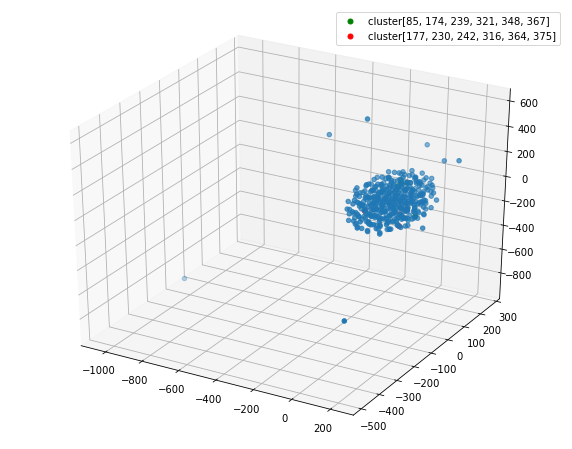

In [1190]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x = graph_points_test[:, 0]
y = graph_points_test[:, 1]
z = graph_points_test[:, 2]

ax.scatter3D(x,y,z)

# for i in clust_topic_counts[clust_topic_counts > 2].index.tolist():
#     idx = obj.doc_topic[obj.doc_topic['clust_topic'] == i].index.tolist()
#     x_labeled = graph_points_test[:, 0][idx]
#     y_labeled = graph_points_test[:, 1][idx]
#     z_labeled = graph_points_test[:, 2][idx]
#     ax.scatter3D(x_labeled,y_labeled,z_labeled, s=25, label='cluster'+str(i))
    
x_labeled = graph_points_test[:, 0][idx]
y_labeled = graph_points_test[:, 1][idx]
z_labeled = graph_points_test[:, 2][idx]

x_labeled2 = graph_points_test[:, 0][idx2]
y_labeled2 = graph_points_test[:, 1][idx2]
z_labeled2 = graph_points_test[:, 2][idx2]

ax.scatter3D(x_labeled,y_labeled,z_labeled, s=25, color='green', label='cluster'+str(idx))
ax.scatter3D(x_labeled2,y_labeled2,z_labeled2, s=25, color='red', label='cluster'+str(idx2))
plt.legend()

In [1082]:
import plotly.offline as off
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import iplot

off.init_notebook_mode(connected=False) # allows for offline mode

In [1096]:
data = []
trace = dict(  # trace is how we "trace" or draw our data on the canvas,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker=dict(size=2.5))
data.append(trace)

layout = dict( # we modify our canvas here, including initial layout and styles
    width=800,
    height=550,
    autosize=False,
    title='Iris dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title='X',  # set titles, very important
            titlefont=dict(
            family='Courier New',
            size=14,
            color='#2f2f2f'),  # we can use hex, rgba, or other color variants
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title='Y',  # set titles, very important
            titlefont=dict(
            family='Courier New',
            size=14,
            color='#4f4f4f'),
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title='Z',  # set titles, very important
            titlefont=dict(
            family='Courier New',
            size=14,
            color='#7f7f7f'),
        ),
        aspectratio = dict( x=1, y=1, z=1 ), # we can compress large dimensions this way
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout) # this finally compiles our figure

# run locally in notebook
iplot(fig)


In [1223]:
tsne = TSNE(n_components=3, perplexity=13)
graph_points_test = tsne.fit_transform(matrix)

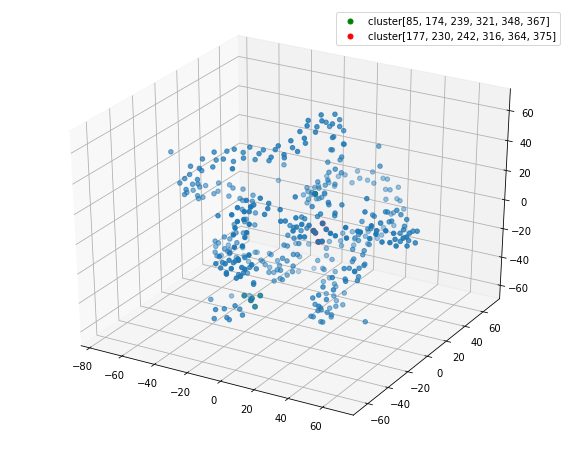

In [1225]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

x = graph_points_test[:, 0]
y = graph_points_test[:, 1]
z = graph_points_test[:, 2]

ax.scatter3D(x,y,z)

# for i in clust_topic_counts[clust_topic_counts > 2].index.tolist():
#     idx = obj.doc_topic[obj.doc_topic['clust_topic'] == i].index.tolist()
#     x_labeled = graph_points_test[:, 0][idx]
#     y_labeled = graph_points_test[:, 1][idx]
#     z_labeled = graph_points_test[:, 2][idx]
#     ax.scatter3D(x_labeled,y_labeled,z_labeled, s=25, label='cluster'+str(i))
    
x_labeled = graph_points_test[:, 0][idx]
y_labeled = graph_points_test[:, 1][idx]
z_labeled = graph_points_test[:, 2][idx]

x_labeled2 = graph_points_test[:, 0][idx2]
y_labeled2 = graph_points_test[:, 1][idx2]
z_labeled2 = graph_points_test[:, 2][idx2]

ax.scatter3D(x_labeled,y_labeled,z_labeled, s=25, color='green', label='cluster'+str(idx))
ax.scatter3D(x_labeled2,y_labeled2,z_labeled2, s=25, color='red', label='cluster'+str(idx2))
plt.legend()

In [1226]:
idx = doc_topic2[doc_topic2['clust_topic'] == 3].index.tolist()
idx2 = doc_topic2[doc_topic2['clust_topic'] == 27].index.tolist()
idx3 = doc_topic2[doc_topic2['clust_topic'] == 5].index.tolist()
idx4 = doc_topic2[doc_topic2['clust_topic'] == 26].index.tolist()
idx5 = doc_topic2[doc_topic2['clust_topic'] == 68].index.tolist()
idx6 = doc_topic2[doc_topic2['clust_topic'] == 57].index.tolist()
idx7 = doc_topic2[doc_topic2['clust_topic'] == 37].index.tolist()
idx8 = doc_topic2[doc_topic2['clust_topic'] == 13].index.tolist()
idx9 = doc_topic2[doc_topic2['clust_topic'] == 17].index.tolist()
idx10 = doc_topic2[doc_topic2['clust_topic'] == 63].index.tolist()

In [1227]:
x_labeled = graph_points_test[:, 0][idx]
y_labeled = graph_points_test[:, 1][idx]
#z_labeled = graph_points_test[:, 2][idx]

x_labeled2 = graph_points_test[:, 0][idx2]
y_labeled2 = graph_points_test[:, 1][idx2]
#z_labeled2 = graph_points_test[:, 2][idx2]

x_labeled3 = graph_points_test[:, 0][idx3]
y_labeled3 = graph_points_test[:, 1][idx3]
#z_labeled3 = graph_points_test[:, 2][idx3]

x_labeled4 = graph_points_test[:, 0][idx4]
y_labeled4 = graph_points_test[:, 1][idx4]
#z_labeled4 = graph_points_test[:, 2][idx4]

x_labeled5 = graph_points_test[:, 0][idx5]
y_labeled5 = graph_points_test[:, 1][idx5]
#z_labeled5 = graph_points_test[:, 2][idx5]

x_labeled6 = graph_points_test[:, 0][idx6]
y_labeled6 = graph_points_test[:, 1][idx6]
#z_labeled6 = graph_points_test[:, 2][idx6]

x_labeled7 = graph_points_test[:, 0][idx7]
y_labeled7 = graph_points_test[:, 1][idx7]
#z_labeled7 = graph_points_test[:, 2][idx7]

x_labeled8 = graph_points_test[:, 0][idx8]
y_labeled8 = graph_points_test[:, 1][idx8]
#z_labeled8 = graph_points_test[:, 2][idx8]

x_labeled9 = graph_points_test[:, 0][idx9]
y_labeled9 = graph_points_test[:, 1][idx9]
#z_labeled9 = graph_points_test[:, 2][idx9]

x_labeled10 = graph_points_test[:, 0][idx10]
y_labeled10 = graph_points_test[:, 1][idx10]
#z_labeled10 = graph_points_test[:, 2][idx10]

In [1228]:
data = []
trace = dict(  # trace is how we "trace" or draw our data on the canvas,
        x = x, y = y, z = z,
        name = 'All Articles',
        type = "scatter3d",    
        mode = 'markers',
        marker=dict(size=2.5))
data.append(trace)

trace2 = dict(  # trace is how we "trace" or draw our data on the canvas,
        x = x_labeled, y = y_labeled, z = z_labeled,
        name = 'Dodd-Frank Executive Order',
        type = "scatter3d",    
        mode = 'markers',
        marker=dict(color='red', size=2.5))
data.append(trace2)

trace3 = dict(  # trace is how we "trace" or draw our data on the canvas,
        x = x_labeled3, y = y_labeled3, z = z_labeled3,
        name = 'Kellyanne Conway-Bowling Green',
        type = "scatter3d",    
        mode = 'markers',
        marker=dict(color='green', size=2.5))
data.append(trace3)

trace4 = dict(  # trace is how we "trace" or draw our data on the canvas,
        x = x_labeled4, y = y_labeled4, z = z_labeled4,
        name = 'Snapchat IPO',
        type = "scatter3d",    
        mode = 'markers',
        marker=dict(color='yellow', size=2.5))
data.append(trace4)

trace5 = dict(  # trace is how we "trace" or draw our data on the canvas,
        x = x_labeled5, y = y_labeled5, z = z_labeled5,
        name = 'Trump-Australia Call',
        type = "scatter3d",    
        mode = 'markers',
        marker=dict(color='orange', size=2.5))
data.append(trace5)

trace6 = dict(  # trace is how we "trace" or draw our data on the canvas,
        x = x_labeled6, y = y_labeled6, z = z_labeled6,
        name = 'Super Bowl-Tom Brady',
        type = "scatter3d",    
        mode = 'markers',
        marker=dict(color='violet', size=2.5))
data.append(trace6)

trace7 = dict(  # trace is how we "trace" or draw our data on the canvas,
        x = x_labeled7, y = y_labeled7, z = z_labeled7,
        name = 'Iran Sanctions',
        type = "scatter3d",    
        mode = 'markers',
        marker=dict(color='black', size=2.5))
data.append(trace7)

trace8 = dict(  # trace is how we "trace" or draw our data on the canvas,
        x = x_labeled8, y = y_labeled8, z = z_labeled8,
        name = 'Job Growth',
        type = "scatter3d",    
        mode = 'markers',
        marker=dict(color='brown', size=2.5))
data.append(trace8)

trace9 = dict(  # trace is how we "trace" or draw our data on the canvas,
        x = x_labeled9, y = y_labeled9, z = z_labeled9,
        name = 'Yemen Raid',
        type = "scatter3d",    
        mode = 'markers',
        marker=dict(color='pink', size=2.5))
data.append(trace9)

trace10 = dict(  # trace is how we "trace" or draw our data on the canvas,
        x = x_labeled10, y = y_labeled10, z = z_labeled10,
        name = 'Incohesive Grouping',
        type = "scatter3d",    
        mode = 'markers',
        marker=dict(color='purple', size=2.5))
data.append(trace10)

trace11 = dict(  # trace is how we "trace" or draw our data on the canvas,
        x = x_labeled2, y = y_labeled2, z = z_labeled2,
        name = 'North Korea Tension',
        type = "scatter3d",    
        mode = 'markers',
        marker=dict(color='gray', size=2.5))
data.append(trace11)

layout = dict( # we modify our canvas here, including initial layout and styles
    width=800,
    height=550,
    autosize=False,
    title='Iris dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title='X',  # set titles, very important
            titlefont=dict(
            family='Courier New',
            size=14,
            color='#2f2f2f'),  # we can use hex, rgba, or other color variants
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title='Y',  # set titles, very important
            titlefont=dict(
            family='Courier New',
            size=14,
            color='#4f4f4f'),
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)',
            title='Z',  # set titles, very important
            titlefont=dict(
            family='Courier New',
            size=14,
            color='#7f7f7f'),
        ),
        aspectratio = dict( x=1, y=1, z=1 ), # we can compress large dimensions this way
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout) # this finally compiles our figure

# run locally in notebook
iplot(fig)


In [902]:
txt = '''The biggest social media IPO since Twitter is here. Snap Inc., the parent company of Snapchat, filed paperwork on Thursday to raise $3 billion in its long-awaited initial public offering. The tech company will only sell non-voting shares when it goes public. It will list on the New York Stock Exchange under the ticker symbol "SNAP." The documents offer the clearest glimpse yet behind the curtain of one of tech's most secretive startups. Snap claims 158 million daily users and said over 2.5 billion Snaps are created every day.

However, the young company warned that its popularity could plateau, hurting its business. It noted that user growth was "relatively flat" in the end of the third quarter. Snap blamed the decline in user growth on performance issues linked to new products and updates.

Snap also continues to struggle to make money -- and it signaled a profit may not be coming soon. The company suffered losses of $515 million in 2016, up from a loss of $373 million the year before.

"We have incurred operating losses in the past, expect to incur operating losses in the future, and may never achieve or maintain profitability," Snap said in the filing.

Not just that, but Snap acknowledged that "for all of our history, we have experienced net losses and negative cash flows."

Snap also warned about the impact of higher expenses, especially legal and accounting costs that public companies deal with.

Snap's financial track record is already bringing unwanted comparisons to Twitter (TWTR), which has failed to turn its strong brand recognition into reliable profits.

"To me, Snap is Twitter 2.0 -- a company with a good growth rate that is losing a ton of cash, coupled with a massive valuation," said Brian Hamilton, cofounder of private company analysis firm Sageworks.

Snap's corporate structure will allow its founders to exert enormous control over the company. The Class A shares being offered in the IPO have no voting rights, meaning they can't weigh in on key matters like who sits on the board, how much executives are paid and on potential mergers.

Founders Evan Spiegel and Robert Murphy will control much of Snap's Class C shares, which are granted 10 votes apiece. Class B shares will have one vote apiece, but it's not clear who holds those and they're not being offered in the IPO.

Wall Street competes intensely to get a piece of marquee IPOs like Snap's. That's why Snap's decision to list on the New York Stock Exchange is a big win for that iconic venue.

Morgan Stanley (MS), Goldman Sachs (GS) and JPMorgan Chase (JPM) also won bragging rights as the banks that are taking Snap public.

As is common, Snap listed a number of risk factors that could hurt the company's growth. One interesting risk: Snap warned that its lack of a designated headquarters may "negatively affect employee morale." Snap is based in Venice, California, but its offices are spread throughout the city, a setup the company said may limit social interaction and oversight of employees.

The company confidentially filed paperwork for an IPO before the presidential election. It took advantage of the Jumpstart Our Business Startups, or JOBS Act, which allows companies with less than $1 billion of annual revenue to file for IPOs in secret.

Snap makes money from an eclectic mix of sources, ranging from traditional video ads and sponsored location-based filters to physical products like smart sunglasses sold out of smiling vending machines and ice trays sold on Amazon (AMZN).

The Snapchat app launched in 2011 and set itself apart from other messaging services with a focus on disappearing messages. It initially developed a reputation as a service for sending salacious pictures, but has since moved far beyond that.

Today, Snap defines itself as a "camera company." It sells Spectacles for recording videos and has built up its flagship app with augmented reality lenses that make sharing posts with friends more playful and engaging.

On any given day, you can flip through collections of posts from users attending the same event or find big name publishers like Vogue, National Geographic and CNN curating content specifically for Snapchat.

Related: Say hello to Snap Inc.

Snapchat's success has forced larger tech services like Facebook (FB), Twitter (TWTR) and Instagram to clone its features, with mixed success. Facebook famously tried to acquire the company for $3 billion in 2013. The sum sounded outlandish at the time -- now, not so much.

The public offering will officially make Snap's cofounder and CEO Spiegel, 26, one of the world's youngest billionaires.

If the stock performs well, Snapchat's IPO could encourage other billion-dollar tech startups to go public. Many startups have preferred to sit on their vast piles of private funding rather than deal with public market scrutiny.

But Snapchat may also have to contend with comparisons to Twitter, which went public amid high expectations in 2013 only to crash and burn after its first earnings report.

Investors thought Twitter might be the next Facebook, with more than one billion users and tremendous demand from advertisers. Instead, Twitter's user base stalled around the 300 million mark.

The challenge for Snapchat, according to Monness, Crespi, Hardt analyst James Cakmak, will be getting investors to focus more on how much users actually "engage" with its services rather than just overall user growth.

"Since they've managed to successfully change the way advertisers think, investors should be an easier sell," Cakmak says, before adding a caveat: "So long as the growth curve remains steep.'''

In [204]:
from text_process import text_preprocess, remove_stop_words, lemmatize
txt_processed = lemmatize(remove_stop_words(text_preprocess(txt)))

# Finding relationship between N_components* and # of articles

In [931]:
var = []
for date in df.date.unique().tolist():
    data = df[df.date == date]
    
    n_articles = len(data)
    n_components = n_articles
    
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform(data['content_processed'])
    
    lsa = TruncatedSVD(n_components)
    doc_topic = lsa.fit_transform(tfidf)
    var.append(np.cumsum(lsa.explained_variance_ratio_))

In [932]:
var

[array([0.00695401, 0.02723699, 0.04601176, 0.06359093, 0.07984553,
        0.09562903, 0.10910443, 0.12164781, 0.13369617, 0.14550064,
        0.15678686, 0.16723336, 0.17698501, 0.18614215, 0.19500853,
        0.20378051, 0.21226173, 0.22049635, 0.22867255, 0.23658831,
        0.24438094, 0.25198365, 0.25947188, 0.26694741, 0.27416552,
        0.28123551, 0.28826969, 0.29516426, 0.30192968, 0.30865872,
        0.31529892, 0.32179278, 0.32816322, 0.33455699, 0.34089551,
        0.34719414, 0.35342932, 0.35965684, 0.36585496, 0.37203557,
        0.37818246, 0.38426856, 0.39031748, 0.39634549, 0.40232415,
        0.40831933, 0.41426446, 0.42016201, 0.42603445, 0.43188977,
        0.43771282, 0.44351265, 0.44928802, 0.45504593, 0.46076861,
        0.46645613, 0.47215007, 0.47781265, 0.48341375, 0.4889988 ,
        0.49454436, 0.50008847, 0.50559771, 0.51108584, 0.51655824,
        0.52201075, 0.52744455, 0.53286626, 0.53827794, 0.54366825,
        0.54905629, 0.55441785, 0.55973893, 0.56

In [947]:
optimal = []
lengths = []
for l in var:
    jackpot.append(np.where(l>0.875)[0][0])
    lengths.append(len(l))

In [949]:
np.mean(np.array(optimal)/np.array(lengths))

0.7473942475745405

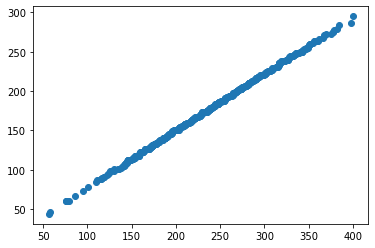

In [951]:
plt.scatter(sorted(lengths), sorted(optimal))

In [956]:
from sklearn.linear_model import LinearRegression

x = np.array(sorted(lengths))
y = np.array(sorted(jackpot))

lr = LinearRegression()
lr.fit(x.reshape(-1,1), y)
lr.coef_

array([0.71986325])

In [957]:
lr.intercept_

5.931500697065047

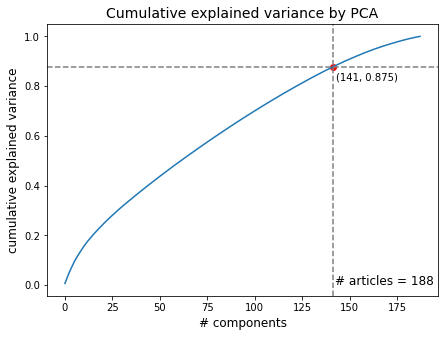

In [999]:
plt.figure(figsize=(7,5))
plt.plot(var[0])
plt.axvline(141, 0 , 1, linestyle='--', color='grey')
plt.axhline(0.875, 0 , 200, linestyle='--', color='grey')
plt.scatter(141, 0.875, color='r')
plt.text(143, 0.825, '(141, 0.875)', size=10)
plt.text(142, 0.0, '# articles = 188', size=12)
plt.xlabel('# components', size=12)
plt.ylabel('cumulative explained variance', size=12);
plt.title('Cumulative explained variance by PCA', size=14)
plt.savefig('pca_explained_var.svg', transparent=True);

In [961]:
np.where(var[0]>.875)[0][0]

141

In [962]:
var[0][141]

0.8771617269681475

In [963]:
len(var[0])

188

# Testing KNN for predictions

In [1129]:
obj.doc_topic[obj.doc_topic.title == 'Your Article']

title     publication        date  \
8  Your Article  New York Times  2017-02-03   

                                             content  \
8  BEIJING     President Trumps combative phone c...   

                                   content_processed  topic_0  topic_1  \
8  beijing president trump combative phone call a...  0.41896 -0.25143   

   topic_2  topic_3  topic_4  ...  topic_291  topic_292  topic_293  topic_294  \
8 -0.11727  0.19335 -0.09899  ...   -0.04155   -0.02573    0.01182     0.0129   

   topic_295  topic_296  topic_297  topic_298  topic_299  clust_topic  
8      0.025     0.0234   -0.03583    0.03786   -0.00368           26  

[1 rows x 306 columns]

In [1132]:
obj.doc_topic

title      publication  \
0    First Day of Syria Peace Talks Quickly Descend...   New York Times   
1    50 Years After Apollo Disaster, Memorial for 3...   New York Times   
2    Trump’s Trade War May Have Already Begun - The...   New York Times   
3    Samantha Bee to Roast Trump on Same Night as C...   New York Times   
4    Billionaire Is Reported Seized From Hong Kong ...   New York Times   
..                                                 ...              ...   
395  Dear Ruth Bader Ginsburg: If you need anything...  Washington Post   
396  Smartphones changed our lives. Let’s think bef...  Washington Post   
397  This CEO was hoping for a Trump tax cut. He’s ...  Washington Post   
398  Super Bowl LI prop bets to avoid at all costs,...  Washington Post   
399  Potential side effects of the drug Trump repor...  Washington Post   

           date                                            content  \
0    2017-02-03  ASTANA, Kazakhstan     The first    meeting be...   
1    2017-02-03  CAPE CANAVERAL, Fla.     Back in his days as a...   
2    2017-02-03  LONDON     Americas traditional allies are on ...   
3    2017-02-03  The annual custom of the White House Correspon...   
4    2017-02-03  HONG KONG     A   billionaire who has forged f...   
..          ...                                                ...   
395  2017-02-03     Rachel Manteuffel works in The Posts Editor...   
396  2017-02-03     Christine Emba edits The Posts In Theory bl...   
397  2017-02-03       When President Trump won the election, Ja...   
398  2017-02-03         Super Bowl LI between the Atlanta Falco...   
399  2017-02-03       President Trumps personal physician recen...   

                                     content_processed  topic_0  topic_1  \
0    astana kazakhstan first meeting syrian rebel f...  0.22901 -0.08322   
1    cape canaveral fla back day test pilot air for...  0.15538  0.06112   
2    london america traditional ally lookout new fr...  0.39928 -0.10623   
3    annual custom white house correspondent associ...  0.28172 -0.02234   
4    hong kong billionaire forged financial tie cou...  0.18432 -0.00421   
..                                                 ...      ...      ...   
395  rachel manteuffel work post editorial departme...  0.16107  0.06125   
396  christine emba edits post theory blog year mar...  0.19381  0.08631   
397  president trump election james hagedorn ready ...  0.27775  0.05915   
398  super bowl li atlanta falcon new england patri...  0.15294  0.34709   
399  president trump personal physician recently re...  0.11870  0.03903   

     topic_2  topic_3  topic_4  ...  topic_291  topic_292  topic_293  \
0   -0.04671  0.06748 -0.03884  ...    0.02410    0.00121   -0.02341   
1   -0.04856  0.02801 -0.07591  ...    0.00622    0.01231    0.02032   
2   -0.00830  0.10218 -0.05807  ...   -0.05423   -0.13384    0.01703   
3   -0.06157  0.02117 -0.07130  ...   -0.04372   -0.00722   -0.01003   
4    0.03456  0.09654 -0.13136  ...    0.00260    0.02595   -0.03289   
..       ...      ...      ...  ...        ...        ...        ...   
395 -0.02477 -0.10723  0.01190  ...   -0.03373   -0.04201    0.03359   
396  0.04819 -0.00482  0.00194  ...    0.02448   -0.02975    0.00013   
397  0.19945  0.05615  0.08218  ...    0.08146   -0.02623   -0.09116   
398 -0.17203  0.14866  0.19807  ...    0.01987   -0.01298    0.04128   
399  0.03185 -0.01112 -0.01873  ...   -0.03124   -0.03282   -0.01939   

     topic_294  topic_295  topic_296  topic_297  topic_298  topic_299  \
0     -0.01501    0.01764   -0.01117   -0.00160    0.03467   -0.00132   
1      0.00747    0.02424    0.00418   -0.00615   -0.00112    0.00811   
2     -0.01575   -0.07301    0.01020    0.03174   -0.03605    0.07015   
3      0.01533   -0.02931   -0.01086   -0.03503    0.03016   -0.02983   
4     -0.02842    0.01432   -0.03483    0.00901   -0.01554   -0.01345   
..         ...        ...        ...        ...        ...        ...   
395    0.00694    

In [1139]:
X = obj.doc_topic.select_dtypes('number').drop('clust_topic', axis = 1).to_numpy()
y = obj.doc_topic['clust_topic']

In [1140]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y )


KNeighborsClassifier()

In [1163]:
t = '''Washington (CNN)President Donald Trump's administration enacted new sanctions on Iran Friday, the first concrete action after the White House put Tehran "on notice" this week.

The Treasury Department said it was applying sanctions on 25 individuals and companies connected to Iran's ballistic missile program and those providing support to Iran's Islamic Revolutionary Guard Corps' Qods Force. That included three separate networks linked to supporting the missile program, which the US opposes.
The moves come as punishment for the country's test launch of a ballistic missile last weekend. National Security Adviser Michael Flynn said the move was "provocative" and in defiance of a United Nations Security Council resolution that bars Iran from taking steps on a ballistic missile program capable of launching nuclear weapons.
"They're not behaving," Trump said of Iran in the Oval Office on Friday as he signed unrelated executive orders.
National Security Adviser Michael Flynn issued a statement on the new sanctions, saying that the "international community has been too tolerant of Iran's bad behavior."
"The days of turning a blind eye to Iran's hostile and belligerent actions toward the United States and the world community are over," Flynn said.
The new sanctions are designed not to impede upon the Iran nuclear deal, which the US and five other world powers signed with Tehran during President Barack Obama's tenure. That plan allowed for the lifting of major sanctions against Iran in exchange for a curtailment of its nuclear program.
Administration officials said Friday the new round of sanctions does not affect any individual or firm that had sanctions lifted as part of the nuclear accord. The officials said that new deals between US companies and Iran, like an agreement with Boeing for a new fleet of jets, were not likely to be affected by the sanctions.
Iran dismisses Trump's 'ranting' and vows more missile tests
Tehran, however, responded by saying the moves were in violation of the nuclear agreement, calling them "illegal" and "extraterritorial."
The sanctions are "contrary to the obligations of the United States," according to the country's official news agency IRNA, which cited the foreign ministry.
Iran's missile program is purely for "defensive purposes," the foreign ministry said.
Trump's Press Secretary Sean Spicer said Friday the White House would continue responding to any Iranian provocations going forward. But he said the moves illustrate the pitfalls of the nuclear agreement.
"Today's sanctions really represent a very, very strong stance against the actions that Iran has been taking, and make it very clear that the deal that they struck previously was not in the best interest of this country, and that President Trump is going to do everything he can to make sure that Iran is stayed in check," Spicer said.
The detailed announcement from the Treasury Department on Friday reflected months of work, US officials said, dating to before Trump took office.
"Treasury has likely been working on these Iran sanctions for months," said a congressional aide. US officials said the deliberative process was "totally normal," despite the new administration still filling key national security roles.
Friday's announcement represents the first concrete step in what the Trump administration has vowed will be a more aggressive approach to Iran.
Trump on Thursday refused to rule out military action against Iran, saying that "nothing is off the table" when it comes to confronting destabilizing behavior from the country. While Obama also refused to rule out military action, Trump's rhetoric reflects a scaled-up posture.
On the campaign trail, Trump railed against the nuclear deal, though his aides have offered a more muted view after he took office. An official who briefed reporters this week suggested the agreement, known as the Joint Comprehensive Plan of Action, would remain in place for now.
In a letter to Trump Thursday, a bipartisan group of senators had encouraged aggressive action against Iran as a rebuttal to its missile launches and support for terror organizations.
US rips 'irresponsible' Iran after missile test
"Iranian leaders must feel sufficient pressure to cease deeply destabilizing activities, from sponsoring terrorist groups to continued testing of ballistic missiles," the lawmakers wrote.
"Full enforcement of existing sanctions and the imposition of additional sanctions on Iran for its ballistic missile program are necessary," the letter said.
On Friday, the move drew swift praise from Republicans on Capitol Hill.
"Iran's dangerous and provocative acts are a direct threat to the United States and our allies," said House Foreign Affairs Committee Chairman Ed Royce in a statement. "I'm glad the administration is taking long-overdue steps to hold the regime accountable."
The new sanctions designate Abdollah Asgharzadeh, an Iranian businessman whom the Treasury Department accused of acting as a procurement agent for the ballistic missile program. It also singled out individuals within Asgharzadeh's network.
Iran to take 'reciprocal measures' after Trump's immigration order
Other entities that were targeted Friday include trading networks associated with Iran's missile program and a network accused of providing cash transfers to Hezbollah, the Lebanon-based terror group.
The Treasury Department said it was freezing all US assets for those individuals and prohibiting Americans from doing business with them. A US official said the individuals who came under sanction on Friday have "touch points" in the US financial system, but couldn't detail their exact exposure in the United States or the precise impact the sanctions will have monetarily.
The sanctions on Iranian individuals and companies were issued under an existing executive order that Trump's two predecessors, George W. Bush and Barack Obama, also used to punish the country for test launches, most recently in January 2016.
A US official said Friday that Washington would continue its response to actions it deems provocative from Iran.
"Iran has to determine its response to our actions," the official said, adding "Iran has a choice to make. We are going to continue to respond to their behavior in an ongoing way, at an appropriate level, to continue to pressure them to change their behavior."'''
procssed = lemmatize(remove_stop_words(text_preprocess(t)))

v = vetorizer.transform([procssed])
w = lsa.transform(v)

In [1168]:
x = doc.select_dtypes('number').drop('clust_topic', axis=1)
y = doc.clust_topic
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x, y)

KNeighborsClassifier(n_neighbors=10)

In [1169]:
knn.predict(w)

array([7])

In [1170]:
doc[doc.clust_topic == 7]

topic_0  topic_1  topic_2  \
title                                                                           
Iran, Puzzled by Trump, Treads Carefully for No...  0.36519 -0.29055 -0.14405   
Donald Trump and the Threat of Global Conflict      0.41463 -0.24021 -0.11789   
Iranians fear attacks and economic isolation as...  0.33479 -0.25748 -0.12279   
Trump may look to strengthen, not shred, Iran n...  0.27839 -0.21921 -0.05949   

                                                    topic_3  topic_4  topic_5  \
title                                                                           
Iran, Puzzled by Trump, Treads Carefully for No...  0.35406 -0.00247 -0.08389   
Donald Trump and the Threat of Global Conflict      0.23341  0.09314  0.04330   
Iranians fear attacks and economic isolation as...  0.36295  0.04932  0.14736   
Trump may look to strengthen, not shred, Iran n...  0.32965  0.07824  0.08918   

                                                    topic_6  topic_7  topic_8  \
title                                                                           
Iran, Puzzled by Trump, Treads Carefully for No... -0.13898  0.02294  0.19100   
Donald Trump and the Threat of Global Conflict     -0.12486 -0.09531 -0.07531   
Iranians fear attacks and economic isolation as... -0.28131  0.07737  0.00667   
Trump may look to strengthen, not shred, Iran n... -0.24281  0.09019  0.03680   

                                                    topic_9  ...  topic_294  \
title                                                        ...              
Iran, Puzzled by Trump, Treads Carefully for No... -0.02179  ...    0.06559   
Donald Trump and the Threat of Global Conflict      0.14152  ...    0.06577   
Iranians fear attacks and economic isolation as...  0.12560  ...    0.05884   
Trump may look to strengthen, not shred, Iran n...  0.12783  ...    0.01592   

                                                    topic_295  topic_296  \
title                                                                      
Iran, Puzzled by Trump, Treads Carefully for No...    0.08842   -0.01058   
Donald Trump and the Threat of Global Conflict        0.05658    0.04604   
Iranians fear attacks and economic isolation as...   -0.01308    0.00507   
Trump may look to strengthen, not shred, Iran n...   -0.14006   -0.00212   

                                                    topic_297  topic_298  \
title                                                                      
Iran, Puzzled by Trump, Treads Carefully for No...   -0.02220   -0.01166   
Donald Trump and the Threat of Global Conflict        0.09738   -0.02785   
Iranians fear attacks and economic isolation as...    0.01355    0.03336   
Trump may look to strengthen, not shred, Iran n...    0.02773   -0.07508   

                                                    topic_299     publication  \
title                                                                           
Iran, Puzzled by Trump, Treads Carefully for No...    0.07162  New York Times   
Donald Trump and the Threat of Global Conflict        0.01505        Atlantic   
Iranians fear attacks and economic isolation as...   -0.00796         Reuters   
Trump may look to strengthen, not shred, Iran n...   -0.05714         Reuters   

                                                                                              content  \
title                                                                                                   
Iran, Puzzled by Trump, Treads Carefully for No...  TEHRAN     Until two weeks ago, Irans clerics ...   
Donald Trump and the Threat of Global Conflict      On Wednesday, his administration issued what s...   
Iranians fear attacks and economic isolation as...   Many Iranians who dreamt of quiet, comfortabl...   
Trump may look to strengthen, not shred, Iran n...   Instead of tearing up the Iran nuclear deal, ...   

                                                                                    